# Toronto emotional speech set (TESS)

There are a set of 200 target words were spoken in the carrier phrase "Say the word _' by two actresses (aged 26 and 64 years) and recordings were made of the set portraying each of seven emotions (anger, disgust, fear, happiness, pleasant surprise, sadness, and neutral). There are 2800 data points (audio files) in total.

The dataset is organised such that each of the two female actor and their emotions are contain within its own folder. And within that, all 200 target words audio file can be found. The format of the audio file is a WAV format

https://utoronto.scholaris.ca/collections/036db644-9790-4ed0-90cc-be1dfb8a4b66

OAF stands for "Older Adult Female". This refers to the actress aged 64 years.

YAF stands for "Younger Adult Female". This refers to the actress aged 26 years.

In [2]:
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
import librosa
module_path = os.path.abspath(os.path.join('..', '..')) # or the path to your source code
sys.path.insert(0, module_path)
from src.data_loading import load_savee, load_iemocap, load_meld, load_emodb, load_ravdess, load_tess, load_crema_d, load_interspeech, filter_emotions

iemocap = filter_emotions(load_iemocap())
meld = filter_emotions(load_meld())
meld_train = filter_emotions(load_meld(split='train'))
meld_train = meld_train[~meld_train['filename'].str.contains('dia125_utt3')]  # remove Ses03M from training set
emodb = filter_emotions(load_emodb())
ravdess = filter_emotions(load_ravdess())
tess = filter_emotions(load_tess())
crema_d = filter_emotions(load_crema_d())
savee = filter_emotions(load_savee())
intspeech = filter_emotions(load_interspeech())
intspeech.head()


Subfolders in the dataset: ['JSON files', 'MELD.Raw']
Subfolders in the raw data: ['dia47_utt11.mp4', 'dia35_utt2.mp4', 'dia47_utt9.mp4', 'dia167_utt14.mp4', 'dia232_utt4.mp4', '._dia118_utt11.mp4', 'dia34_utt2.mp4', 'dia268_utt8.mp4', 'dia233_utt4.mp4', '._dia39_utt1.mp4', '._dia230_utt3.mp4', 'dia137_utt0.mp4', '._dia268_utt11.mp4', '._dia231_utt3.mp4', 'dia136_utt0.mp4', '._dia38_utt1.mp4', '._dia34_utt16.mp4', '._dia128_utt2.mp4', 'dia28_utt7.mp4', 'dia195_utt8.mp4', 'dia22_utt15.mp4', '._dia129_utt2.mp4', '._dia100_utt5.mp4', 'dia29_utt7.mp4', 'dia103_utt2.mp4', 'final_videos_testdia48_utt3.mp4', 'dia154_utt12.mp4', '._dia95_utt11.mp4', '._dia205_utt1.mp4', 'dia102_utt2.mp4', 'dia107_utt8.mp4', 'dia253_utt11.mp4', '._dia52_utt5.mp4', 'dia175_utt3.mp4', 'dia93_utt0.mp4', '._dia272_utt0.mp4', '._dia192_utt5.mp4', 'dia174_utt3.mp4', '._dia53_utt5.mp4', 'dia175_utt13.mp4', 'dia92_utt0.mp4', 'dia191_utt2.mp4', 'dia77_utt1.mp4', 'dia259_utt0.mp4', 'dia270_utt7.mp4', 'dia123_utt11.mp4', 

filename    label
0  /Users/krazmic/.cache/kagglehub/datasets/rushi...    happy
1  /Users/krazmic/.cache/kagglehub/datasets/rushi...    happy
2  /Users/krazmic/.cache/kagglehub/datasets/rushi...  neutral
3  /Users/krazmic/.cache/kagglehub/datasets/rushi...    angry
4  /Users/krazmic/.cache/kagglehub/datasets/rushi...    angry

<Axes: title={'center': 'Emotion Distribution in TESS'}, xlabel='label'>

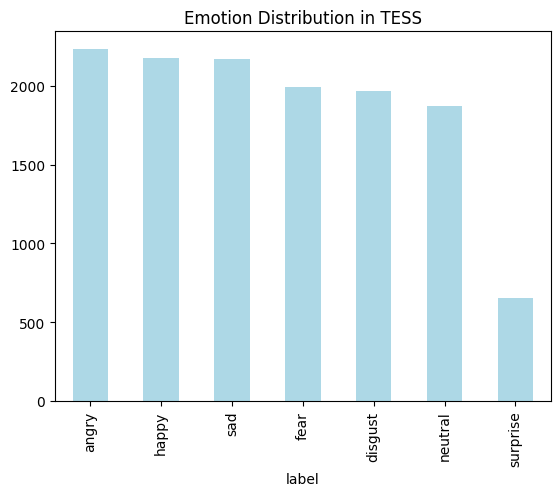

In [3]:
df = pd.concat([emodb, ravdess, tess, crema_d, savee, intspeech], ignore_index=True)
df['label'].value_counts().plot(kind='bar', color='lightblue', title='Emotion Distribution in TESS')

## Transcription

In [ ]:
import torch
from transformers import AutoModelForSpeechSeq2Seq, AutoProcessor, pipeline
from datasets import load_dataset


device = "cuda:0" if torch.cuda.is_available() else "cpu"
torch_dtype = torch.float16 if torch.cuda.is_available() else torch.float32

model_id = "openai/whisper-large-v3"

model = AutoModelForSpeechSeq2Seq.from_pretrained(
    model_id, torch_dtype=torch_dtype, low_cpu_mem_usage=True, use_safetensors=True
)
model.to(device)

processor = AutoProcessor.from_pretrained(model_id)

pipe = pipeline(
    "automatic-speech-recognition",
    model=model,
    tokenizer=processor.tokenizer,
    feature_extractor=processor.feature_extractor,
    torch_dtype=torch_dtype,
    device=device,
)

#dataset = load_dataset("distil-whisper/librispeech_long", "clean", split="validation")
#sample = dataset[0]["audio"]

sample, _ = librosa.load(emodb.iloc[6].filename)

result = pipe(sample, return_timestamps=True)
print(result["text"])


2025-10-18 22:47:52.996204: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/3.09G [00:00<?, ?B/s]

generation_config.json: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/340 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

normalizer.json: 0.00B [00:00, ?B/s]

added_tokens.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/transformers/models/whisper/generation_whisper.py:509: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.43.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


 Die wird auf dem Platz sein, wo wir sie immer hinlegen.


# Librosa

In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from src.evaluation import plot_confusion_matrix
import numpy as np
from tqdm import tqdm
tqdm.pandas()

def extract_features(y, sr=16000, n_mfcc=13, frame_length=2048, hop_length=512):
    features = {}

    # 1. MFCCs + delta
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=frame_length, hop_length=hop_length)
    delta_mfcc = librosa.feature.delta(mfcc, mode='nearest')
    features['mfcc'] = mfcc
    features['delta_mfcc'] = delta_mfcc

    # 2. Chroma
    features['chroma'] = librosa.feature.chroma_stft(y=y, sr=sr, n_fft=frame_length, hop_length=hop_length)

    # 3. Mel-spectrogram
    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=frame_length, hop_length=hop_length)
    features['mel'] = librosa.power_to_db(mel)

    # 4. RMS energy
    features['rms'] = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)

    # 5. Zero Crossing Rate
    features['zcr'] = librosa.feature.zero_crossing_rate(y, frame_length=frame_length, hop_length=hop_length)

    # 6. Spectral features
    features['spectral_centroid'] = librosa.feature.spectral_centroid(y=y, sr=sr, n_fft=frame_length, hop_length=hop_length)
    features['spectral_bandwidth'] = librosa.feature.spectral_bandwidth(y=y, sr=sr, n_fft=frame_length, hop_length=hop_length)
    features['spectral_contrast'] = librosa.feature.spectral_contrast(y=y, sr=sr, n_fft=frame_length, hop_length=hop_length)
    features['spectral_rolloff'] = librosa.feature.spectral_rolloff(y=y, sr=sr, n_fft=frame_length, hop_length=hop_length)
    features['spectral_flatness'] = librosa.feature.spectral_flatness(y=y, n_fft=frame_length, hop_length=hop_length)

    return features


def aggregate_features(features_dict):
    """Transforma features 2D em vetores 1D com média + desvio padrão."""
    agg_features = []
    for key, feat in features_dict.items():
        agg_features.append(np.mean(feat, axis=1))
        agg_features.append(np.std(feat, axis=1))
    return np.concatenate(agg_features)

def extract_aggregate_audio_features(file_path):
    # Carregar arquivo de áudio
    y, sr = librosa.load(file_path, sr=16000)

    # Extrair features
    features = extract_features(y, sr)
    X = aggregate_features(features)

    return X

#print("Shape do vetor final:", X.shape)  # pronto para SVM



In [5]:
#ser_feats = iemocap['filename'].progress_apply(extract_aggregate_audio_features)
#ser_feats.to_csv('iemocap_agg_features.csv', index=False)
#ser_feats = meld['filename'].progress_apply(extract_aggregate_audio_features)
#ser_feats.to_csv('meld_agg_features.csv', index=False)
#ser_feats = meld_train['filename'].progress_apply(extract_aggregate_audio_features)
#ser_feats.to_csv('meld_train_agg_features.csv', index=False)
#ser_feats = emodb['filename'].progress_apply(extract_aggregate_audio_features)
#ser_feats.to_csv('emodb_agg_features.csv', index=False)
#ser_feats = ravdess['filename'].progress_apply(extract_aggregate_audio_features)
#ser_feats.to_csv('ravdess_agg_features.csv', index=False)
#ser_feats = tess['filename'].progress_apply(extract_aggregate_audio_features)
#ser_feats.to_csv('tess_agg_features.csv', index=False)
#ser_feats = crema_d['filename'].progress_apply(extract_aggregate_audio_features)
#ser_feats.to_csv('crema_d_agg_features.csv', index=False)
#ser_feats = savee['filename'].progress_apply(extract_aggregate_audio_features)
#ser_feats.to_csv('savee_agg_features.csv', index=False)
#ser_feats = intspeech['filename'].progress_apply(extract_aggregate_audio_features)
#ser_feats.to_csv('intspeech_agg_features.csv', index=False)

iemocap_feats = pd.read_csv('iemocap_agg_features.csv')
meld_feats = pd.read_csv('meld_agg_features.csv')
meld_train_feats = pd.read_csv('meld_train_agg_features.csv')
emodb_feats = pd.read_csv('emodb_agg_features.csv')
ravdess_feats = pd.read_csv('ravdess_agg_features.csv')
tess_feats = pd.read_csv('tess_agg_features.csv')
crema_d_feats = pd.read_csv('crema_d_agg_features.csv')
savee_feats = pd.read_csv('savee_agg_features.csv')
intspeech_feats = pd.read_csv('intspeech_agg_features.csv')

## More detailed features

In [6]:
import librosa
import numpy as np
from scipy.stats import skew, kurtosis


def extract_short_term_features(y, sr=16000, frame_length=2048, hop_length=512):
    features = {}
    
    # Temporal features
    features['zcr'] = librosa.feature.zero_crossing_rate(y, 
                        frame_length=frame_length, 
                        hop_length=hop_length)
    
    features['rms'] = librosa.feature.rms(y=y, 
                      frame_length=frame_length, 
                      hop_length=hop_length)
    
    # Spectral features
    S = librosa.stft(y, n_fft=frame_length, hop_length=hop_length)
    S_magnitude = np.abs(S)
    features['spectral_centroid'] = librosa.feature.spectral_centroid(S=S_magnitude)
    features['spectral_bandwidth'] = librosa.feature.spectral_bandwidth(S=S_magnitude)
    features['spectral_contrast'] = librosa.feature.spectral_contrast(S=S_magnitude, sr=sr)
    features['spectral_rolloff'] = librosa.feature.spectral_rolloff(S=S_magnitude, sr=sr)
    
    # MFCCs
    features['mfcc'] = librosa.feature.mfcc(y=y, sr=sr, 
                       n_mfcc=40,
                       n_fft=frame_length,
                       hop_length=hop_length)
    
    # Chroma
    features['chroma'] = librosa.feature.chroma_stft(y=y, sr=sr, 
                        n_fft=frame_length,
                        hop_length=hop_length)
    
    # Mel-scaled spectrogram
    mel = librosa.feature.melspectrogram(y=y, sr=sr, 
                    n_fft=frame_length,
                    hop_length=hop_length)
    features['mel'] = librosa.power_to_db(mel)
    
    # Harmonic/percussive
    y_harm = librosa.effects.harmonic(y)
    y_perc = librosa.effects.percussive(y)
    features['harmonic'] = librosa.feature.rms(y=y_harm)
    features['percussive'] = librosa.feature.rms(y=y_perc)
    
    return features

def extract_long_term_features(y, sr=16000):
    features = {}
    
    # Short-term feature statistics
    st_features = extract_short_term_features(y, sr)
    
    # Aggregate statistics
    for name, vals in st_features.items():
        features[f'{name}_mean'] = np.mean(vals, axis=1)
        features[f'{name}_std'] = np.std(vals, axis=1)
        features[f'{name}_skew'] = skew(vals, axis=1)
        features[f'{name}_kurtosis'] = kurtosis(vals, axis=1)
    
    # Global features
    features['tempo'] = librosa.beat.tempo(y=y, sr=sr)[0]
    features['tempogram'] = librosa.feature.tempogram(y=y, sr=sr)
    features['spectral_flatness'] = librosa.feature.spectral_flatness(y=y)
    features['tonnetz'] = librosa.feature.tonnetz(y=y, sr=sr)
    features['poly_features'] = librosa.feature.poly_features(S=np.abs(librosa.stft(y)))
    
    return features


def flatten_features(features):
    return np.concatenate([v.flatten() for v in features.values()])

def extract_short_and_large_term_features(file):

    # Load audio
    y, sr = librosa.load(file, sr=16000)

    # Extract both feature types
    st_features = extract_short_term_features(y, sr)  # Returns dict of 2D arrays
    lt_features = extract_long_term_features(y, sr)   # Returns dict of 1D vectors

    # Convert to ML-ready format
    X_short_term = flatten_features(st_features)  # For sequence models (LSTM)
    X_long_term = flatten_features(lt_features)   # For static classifiers (SVM)

    return X_short_term, X_long_term
    


#X_long_term = emodb['filename'].progress_apply(lambda x: extract_short_and_large_term_features(x)[1])


The "mean MFCCs" always come with the same length because of two key factors in their calculation:

The n_mfcc parameter: This parameter directly specifies how many Mel-frequency cepstral coefficients you want to extract per frame. It's a fixed number that you define (e.g., 40 in your code). This means that for each individual frame of audio, you will get a vector of n_mfcc values.

librosa.feature.mfcc actually returns a 2D array with shape (n_mfcc, num_frames).
The first dimension (n_mfcc) represents the different cepstral coefficients. These capture various aspects of the spectral envelope (the "timbre" or "quality" of the sound). You decide how many of these you want to keep.
The second dimension (num_frames) represents time. It tells you how many short time windows (frames) were processed from the audio. As we discussed, this number does vary with the length of the audio file.
 The np.mean(..., axis=1) operation: This is the crucial step that collapses the time dimension (num_frames) into a single set of statistics.

When you apply np.mean(mfccs, axis=1) (or np.mean(mfccs.T, axis=0) which is equivalent to np.mean(mfccs, axis=1) if mfccs is (n_mfcc, num_frames)), you are calculating the average value for each of the n_mfcc coefficients across all the num_frames of the audio file.
Think of it like this: If you have a matrix where rows are coefficients and columns are frames, axis=1 tells NumPy to calculate the mean along the columns. This means for each row (each coefficient), you get one mean value.
So, regardless of whether your audio file was 1 second long (e.g., 94 frames) or 10 seconds long (e.g., 940 frames), if you calculate the mean across the time axis, you will still end up with n_mfcc mean values.

In [7]:
# perform grid search and save best model with joblib
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import joblib

param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__gamma': ['scale', 'auto']
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

### RAVDESS, CREMA-D, SAVEE, INTERSPEECH

In [19]:
df = pd.concat([ravdess, crema_d, savee, intspeech], ignore_index=True)
ser_feats = pd.concat([ravdess_feats, crema_d_feats, savee_feats, intspeech_feats], ignore_index=True)

In [31]:
# Split e treino
y = df['label']
X = np.vstack(ser_feats['filename'].apply(lambda x: np.fromstring(x.strip("[]"), sep=' ')).values)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
print(X_train.shape)

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'long_svm_RCSIn.joblib')

(7851, 358)
Fitting 5 folds for each of 18 candidates, totalling 90 fits


/opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See h

[CV] END ...svc__C=0.1, svc__gamma=scale, svc__kernel=linear; total time=  15.7s
[CV] END ...svc__C=0.1, svc__gamma=scale, svc__kernel=linear; total time=  15.7s
[CV] END ...svc__C=0.1, svc__gamma=scale, svc__kernel=linear; total time=  15.9s
[CV] END ...svc__C=0.1, svc__gamma=scale, svc__kernel=linear; total time=  16.0s
[CV] END ...svc__C=0.1, svc__gamma=scale, svc__kernel=linear; total time=  16.0s
[CV] END ......svc__C=0.1, svc__gamma=scale, svc__kernel=rbf; total time=  19.5s
[CV] END ......svc__C=0.1, svc__gamma=scale, svc__kernel=rbf; total time=  19.9s
[CV] END ......svc__C=0.1, svc__gamma=scale, svc__kernel=rbf; total time=  20.3s
[CV] END ......svc__C=0.1, svc__gamma=scale, svc__kernel=rbf; total time=  20.2s
[CV] END ......svc__C=0.1, svc__gamma=scale, svc__kernel=rbf; total time=  20.3s
[CV] END ....svc__C=0.1, svc__gamma=auto, svc__kernel=linear; total time=  15.9s
[CV] END .....svc__C=0.1, svc__gamma=scale, svc__kernel=poly; total time=  20.4s
[CV] END .....svc__C=0.1, sv

['long_svm_RCSIn.joblib']

              precision    recall  f1-score   support

       angry       0.74      0.79      0.76       341
     disgust       0.56      0.54      0.55       305
        fear       0.60      0.55      0.57       305
       happy       0.64      0.61      0.62       341
     neutral       0.61      0.67      0.64       279
         sad       0.67      0.68      0.68       342
    surprise       0.84      0.84      0.84        50

    accuracy                           0.65      1963
   macro avg       0.67      0.67      0.67      1963
weighted avg       0.65      0.65      0.65      1963



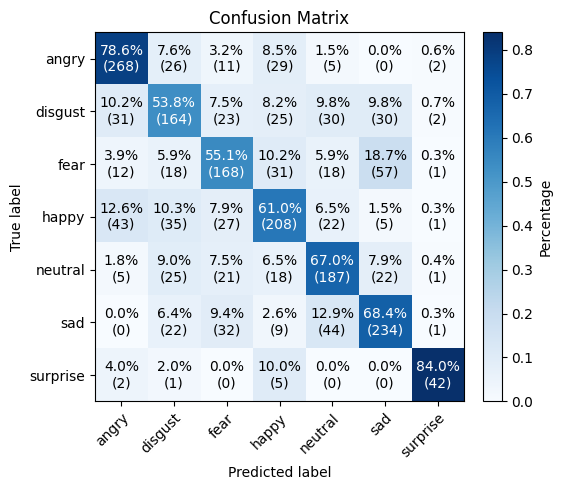

In [32]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

       angry       0.86      0.14      0.24      1103
     disgust       0.00      0.00      0.00         2
        fear       0.02      0.47      0.04        40
       happy       0.12      0.08      0.09       595
     neutral       0.51      0.09      0.16      1708
         sad       0.36      0.76      0.49      1084
    surprise       0.00      0.00      0.00       107

    accuracy                           0.26      4639
   macro avg       0.27      0.22      0.15      4639
weighted avg       0.49      0.26      0.24      4639



/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

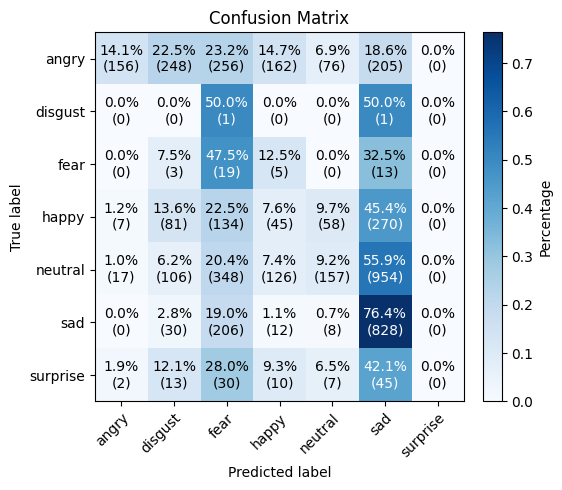

In [34]:
y_test = iemocap['label']
X_test = np.vstack(iemocap_feats['filename'].apply(lambda x: np.fromstring(x.strip("[]"), sep=' ')).values)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

       angry       0.17      0.02      0.04       345
     disgust       0.04      0.38      0.07        68
        fear       0.02      0.30      0.04        50
       happy       0.17      0.36      0.23       402
     neutral       0.54      0.09      0.16      1256
         sad       0.17      0.09      0.12       208
    surprise       0.00      0.00      0.00       281

    accuracy                           0.13      2610
   macro avg       0.16      0.18      0.09      2610
weighted avg       0.32      0.13      0.13      2610



/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

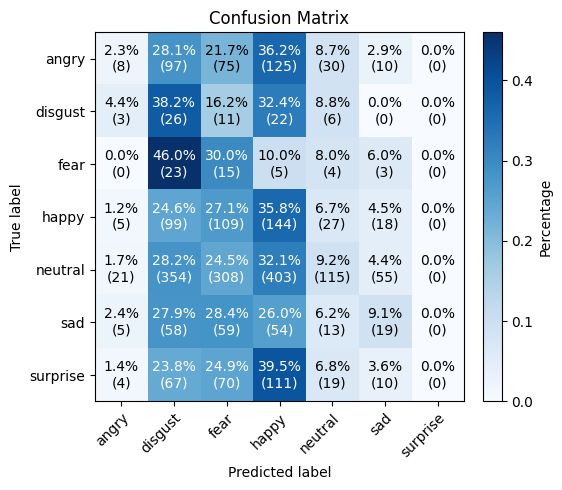

In [35]:
y_test = meld['label']
X_test = np.vstack(meld_feats['filename'].apply(lambda x: np.fromstring(x.strip("[]"), sep=' ')).values)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

### 3. Train on TESS, RAVDESS, CREMA-D, SAVEE, InterSpeeech
MELD removed because it was overfitting

In [8]:
df = pd.concat([tess, ravdess, crema_d, savee, intspeech], ignore_index=True)
ser_feats = pd.concat([tess_feats, ravdess_feats, crema_d_feats, savee_feats, intspeech_feats], ignore_index=True)

# Split e treino
y = df['label']
X = np.vstack(ser_feats['filename'].apply(lambda x: np.fromstring(x.strip("[]"), sep=' ')).values)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
print(X_train.shape)

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'long_svm_TRCSInM.joblib')

(10091, 358)
Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ...svc__C=0.1, svc__gamma=scale, svc__kernel=linear; total time=  23.3s
[CV] END ...svc__C=0.1, svc__gamma=scale, svc__kernel=linear; total time=  23.4s
[CV] END ...svc__C=0.1, svc__gamma=scale, svc__kernel=linear; total time=  23.5s
[CV] END ...svc__C=0.1, svc__gamma=scale, svc__kernel=linear; total time=  23.6s
[CV] END ...svc__C=0.1, svc__gamma=scale, svc__kernel=linear; total time=  23.6s
[CV] END ......svc__C=0.1, svc__gamma=scale, svc__kernel=rbf; total time=  33.5s
[CV] END ......svc__C=0.1, svc__gamma=scale, svc__kernel=rbf; total time=  34.0s
[CV] END ......svc__C=0.1, svc__gamma=scale, svc__kernel=rbf; total time=  34.1s
[CV] END ......svc__C=0.1, svc__gamma=scale, svc__kernel=rbf; total time=  34.7s
[CV] END ....svc__C=0.1, svc__gamma=auto, svc__kernel=linear; total time=  24.6s
[CV] END ......svc__C=0.1, svc__gamma=scale, svc__kernel=rbf; total time=  35.3s
[CV] END .....svc__C=0.1, svc__gamm

['long_svm_TRCSInM.joblib']

              precision    recall  f1-score   support

       angry       0.81      0.84      0.83       421
     disgust       0.63      0.61      0.62       385
        fear       0.70      0.62      0.66       385
       happy       0.74      0.71      0.73       421
     neutral       0.70      0.76      0.73       359
         sad       0.72      0.77      0.74       422
    surprise       0.92      0.91      0.91       130

    accuracy                           0.73      2523
   macro avg       0.75      0.75      0.74      2523
weighted avg       0.73      0.73      0.73      2523



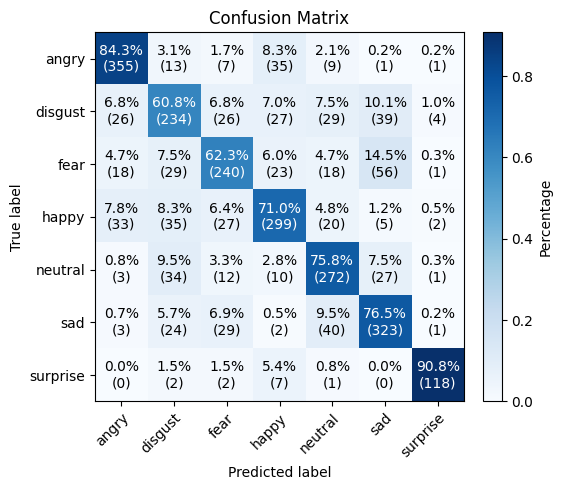

In [9]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

       angry       0.87      0.10      0.18      1103
     disgust       0.00      0.50      0.00         2
        fear       0.02      0.35      0.04        40
       happy       0.15      0.07      0.09       595
     neutral       0.54      0.14      0.23      1708
         sad       0.36      0.85      0.51      1084
    surprise       0.00      0.00      0.00       107

    accuracy                           0.29      4639
   macro avg       0.28      0.29      0.15      4639
weighted avg       0.51      0.29      0.26      4639



/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

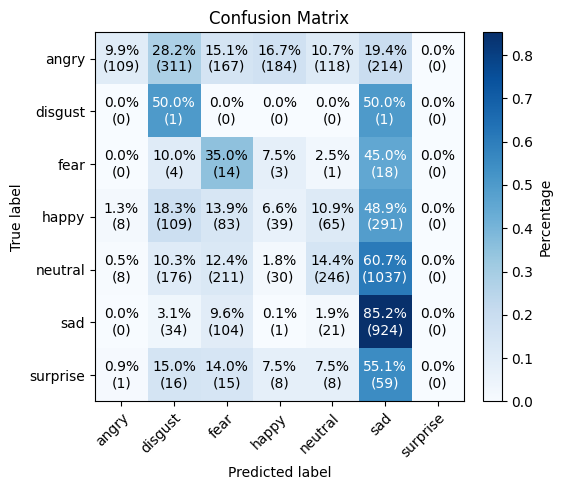

In [10]:
y_test = iemocap['label']
X_test = np.vstack(iemocap_feats['filename'].apply(lambda x: np.fromstring(x.strip("[]"), sep=' ')).values)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

       angry       0.23      0.03      0.05       345
     disgust       0.04      0.38      0.07        68
        fear       0.01      0.26      0.03        50
       happy       0.17      0.24      0.20       402
     neutral       0.55      0.12      0.20      1256
         sad       0.10      0.07      0.08       208
    surprise       0.00      0.00      0.00       281

    accuracy                           0.12      2610
   macro avg       0.16      0.16      0.09      2610
weighted avg       0.33      0.12      0.14      2610



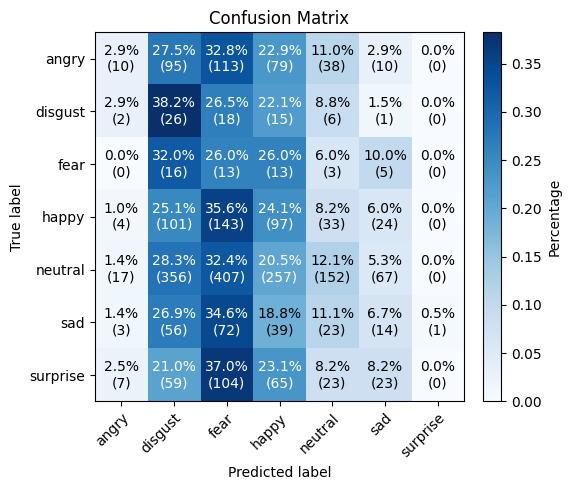

In [11]:
y_test = meld['label']
X_test = np.vstack(meld_feats['filename'].apply(lambda x: np.fromstring(x.strip("[]"), sep=' ')).values)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

(10091, 358)
Alg. 1: Selected top 286 features out of 358 total features.
Alg. 2: Selected 164 features out of 286 total features.
              precision    recall  f1-score   support

       angry       0.79      0.84      0.82       421
     disgust       0.62      0.61      0.61       385
        fear       0.71      0.64      0.67       385
       happy       0.74      0.69      0.71       421
     neutral       0.70      0.75      0.73       359
         sad       0.73      0.77      0.75       422
    surprise       0.92      0.92      0.92       130

    accuracy                           0.73      2523
   macro avg       0.74      0.75      0.74      2523
weighted avg       0.73      0.73      0.73      2523



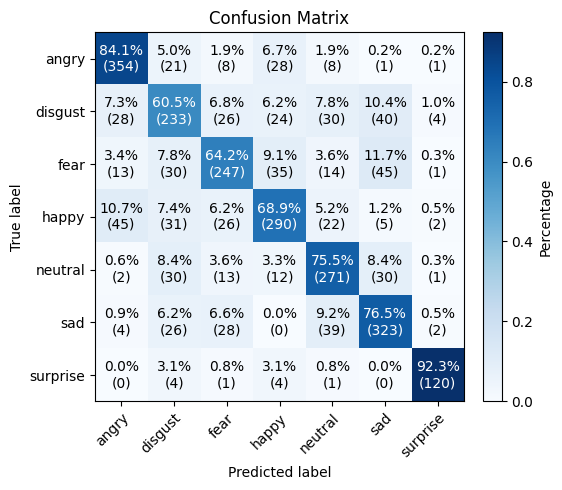

In [13]:
from src.feature_selection import FeatureSelector
pipeline_fs = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection1', FeatureSelector(algorithm="algorithm1", L=0.80, dispersion_measure="MAD", similarity_measure="AC")),
    ('scaler2', StandardScaler()),
    ('feature_selection2', FeatureSelector(algorithm="algorithm2", L=0.95, MS=0.75, dispersion_measure="MAD", similarity_measure="AC")),
    ('svc', SVC(C=10, kernel='rbf', gamma='scale'))
])

# Split e treino
y = df['label']
X = np.vstack(ser_feats['filename'].apply(lambda x: np.fromstring(x.strip("[]"), sep=' ')).values)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
print(X_train.shape)

model = pipeline_fs.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

       angry       0.74      0.17      0.28      1103
     disgust       0.00      0.00      0.00         2
        fear       0.01      0.62      0.03        40
       happy       0.05      0.01      0.02       595
     neutral       0.64      0.14      0.23      1708
         sad       0.34      0.33      0.33      1084
    surprise       0.00      0.00      0.00       107

    accuracy                           0.17      4639
   macro avg       0.25      0.18      0.13      4639
weighted avg       0.50      0.17      0.23      4639



/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

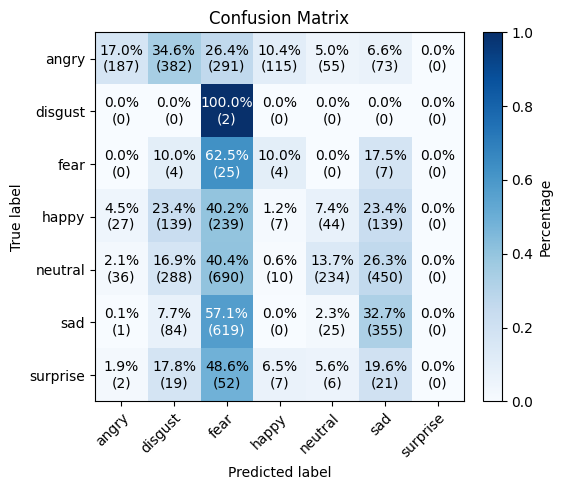

In [14]:
y_test = iemocap['label']
X_test = np.vstack(iemocap_feats['filename'].apply(lambda x: np.fromstring(x.strip("[]"), sep=' ')).values)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

       angry       0.12      0.02      0.03       345
     disgust       0.04      0.35      0.07        68
        fear       0.02      0.58      0.05        50
       happy       0.15      0.09      0.12       402
     neutral       0.56      0.15      0.24      1256
         sad       0.13      0.11      0.12       208
    surprise       0.00      0.00      0.00       281

    accuracy                           0.12      2610
   macro avg       0.15      0.19      0.09      2610
weighted avg       0.32      0.12      0.15      2610



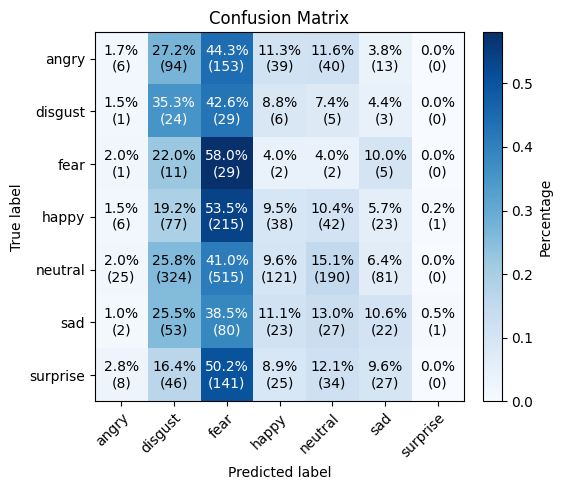

In [15]:
y_test = meld['label']
X_test = np.vstack(meld_feats['filename'].apply(lambda x: np.fromstring(x.strip("[]"), sep=' ')).values)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

### 2. Train on RAVDESS, CREMA-D, SAVEE, InterSpeeech and MELD

In [36]:
df = pd.concat([ravdess, crema_d, savee, intspeech, meld_train], ignore_index=True)
ser_feats = pd.concat([ravdess_feats, crema_d_feats, savee_feats, intspeech_feats, meld_train_feats], ignore_index=True)

In [37]:
# Split e treino
y = df['label']
X = np.vstack(ser_feats['filename'].apply(lambda x: np.fromstring(x.strip("[]"), sep=' ')).values)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
print(X_train.shape)

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'long_svm_RCSInM.joblib')

(15841, 358)
Fitting 5 folds for each of 18 candidates, totalling 90 fits


/opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See h

[CV] END ......svc__C=0.1, svc__gamma=scale, svc__kernel=rbf; total time= 1.7min
[CV] END ......svc__C=0.1, svc__gamma=scale, svc__kernel=rbf; total time= 1.7min
[CV] END ......svc__C=0.1, svc__gamma=scale, svc__kernel=rbf; total time= 1.7min
[CV] END ...svc__C=0.1, svc__gamma=scale, svc__kernel=linear; total time= 1.7min
[CV] END ...svc__C=0.1, svc__gamma=scale, svc__kernel=linear; total time= 1.7min
[CV] END ...svc__C=0.1, svc__gamma=scale, svc__kernel=linear; total time= 1.7min
[CV] END ...svc__C=0.1, svc__gamma=scale, svc__kernel=linear; total time= 1.7min
[CV] END ...svc__C=0.1, svc__gamma=scale, svc__kernel=linear; total time= 1.7min
[CV] END ......svc__C=0.1, svc__gamma=scale, svc__kernel=rbf; total time= 1.6min
[CV] END ......svc__C=0.1, svc__gamma=scale, svc__kernel=rbf; total time= 1.6min
[CV] END .....svc__C=0.1, svc__gamma=scale, svc__kernel=poly; total time= 1.6min
[CV] END .....svc__C=0.1, svc__gamma=scale, svc__kernel=poly; total time= 1.6min
[CV] END .....svc__C=0.1, sv

['long_svm_RCSInM.joblib']

              precision    recall  f1-score   support

       angry       0.67      0.56      0.61       563
     disgust       0.57      0.42      0.48       359
        fear       0.58      0.45      0.51       358
       happy       0.48      0.38      0.42       690
     neutral       0.52      0.79      0.63      1221
         sad       0.57      0.49      0.53       478
    surprise       0.43      0.22      0.29       292

    accuracy                           0.54      3961
   macro avg       0.55      0.47      0.50      3961
weighted avg       0.54      0.54      0.53      3961



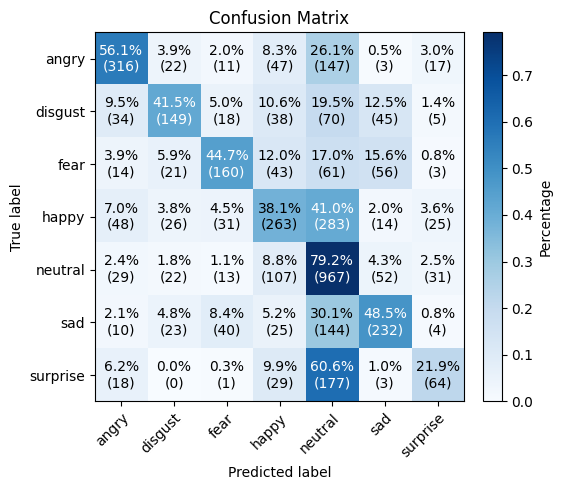

In [38]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

       angry       0.57      0.18      0.28      1103
     disgust       0.00      0.00      0.00         2
        fear       0.01      0.03      0.01        40
       happy       0.16      0.57      0.25       595
     neutral       0.47      0.49      0.48      1708
         sad       0.49      0.04      0.08      1084
    surprise       0.01      0.01      0.01       107

    accuracy                           0.31      4639
   macro avg       0.24      0.19      0.16      4639
weighted avg       0.44      0.31      0.29      4639



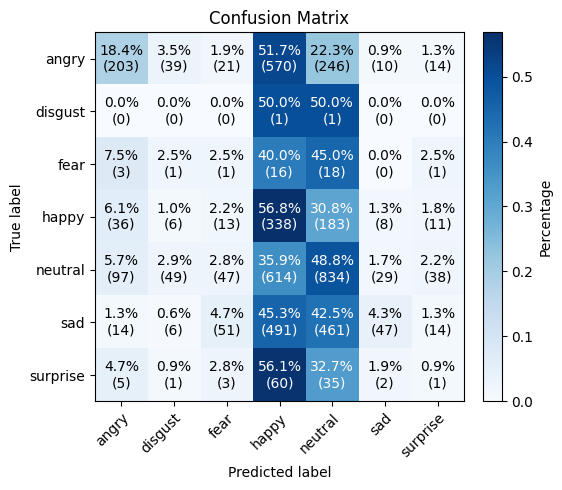

In [39]:
y_test = iemocap['label']
X_test = np.vstack(iemocap_feats['filename'].apply(lambda x: np.fromstring(x.strip("[]"), sep=' ')).values)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

       angry       0.27      0.14      0.19       345
     disgust       0.00      0.00      0.00        68
        fear       0.14      0.02      0.04        50
       happy       0.19      0.13      0.15       402
     neutral       0.51      0.81      0.63      1256
         sad       0.21      0.02      0.04       208
    surprise       0.25      0.09      0.14       281

    accuracy                           0.44      2610
   macro avg       0.22      0.17      0.17      2610
weighted avg       0.36      0.44      0.37      2610



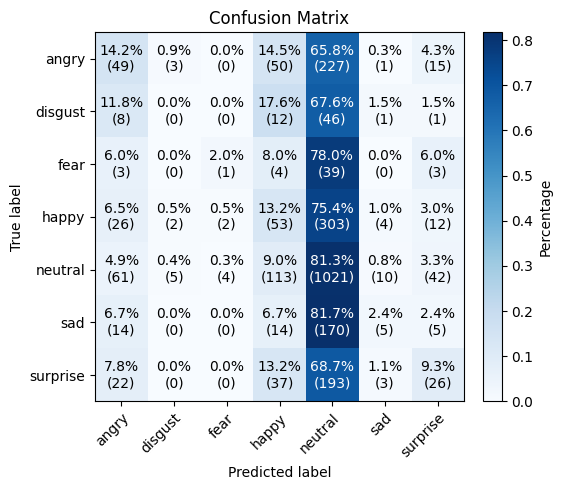

In [40]:
y_test = meld['label']
X_test = np.vstack(meld_feats['filename'].apply(lambda x: np.fromstring(x.strip("[]"), sep=' ')).values)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

### EMODB, RAVDESS, TESS, CREMA-D, SAVEE, INTERSPEECH

(15841, 358)
Alg. 1: Selected top 286 features out of 358 total features.
Alg. 2: Selected 188 features out of 286 total features.
              precision    recall  f1-score   support

       angry       0.65      0.55      0.60       563
     disgust       0.52      0.39      0.45       359
        fear       0.56      0.44      0.49       358
       happy       0.45      0.38      0.41       690
     neutral       0.53      0.78      0.63      1221
         sad       0.58      0.48      0.53       478
    surprise       0.45      0.23      0.30       292

    accuracy                           0.53      3961
   macro avg       0.53      0.46      0.49      3961
weighted avg       0.53      0.53      0.52      3961



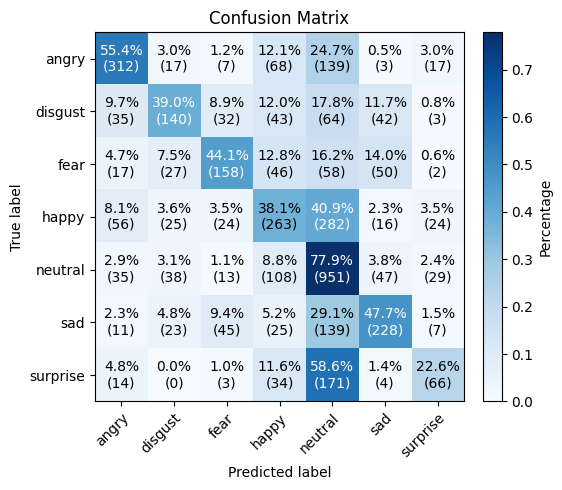

In [ ]:
df = pd.concat([emodb, ravdess, tess, crema_d, savee, intspeech], ignore_index=True)
# Split e treino
y = df['label']
X = np.vstack(ser_feats['filename'].apply(lambda x: np.fromstring(x.strip("[]"), sep=' ')).values)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
print(X_train.shape)

from src.feature_selection import FeatureSelector
pipeline_fs = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection1', FeatureSelector(algorithm="algorithm1", L=0.80, dispersion_measure="MAD", similarity_measure="AC")),
    ('scaler2', StandardScaler()),
    ('feature_selection2', FeatureSelector(algorithm="algorithm2", L=0.95, MS=0.75, dispersion_measure="MAD", similarity_measure="AC")),
    ('svc', SVC(C=10, kernel='rbf', gamma='scale'))
])

model = pipeline_fs.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

       angry       0.63      0.19      0.30      1103
     disgust       0.00      0.00      0.00         2
        fear       0.01      0.03      0.01        40
       happy       0.17      0.40      0.24       595
     neutral       0.48      0.63      0.54      1708
         sad       0.50      0.09      0.16      1084
    surprise       0.07      0.08      0.08       107

    accuracy                           0.35      4639
   macro avg       0.26      0.20      0.19      4639
weighted avg       0.47      0.35      0.34      4639



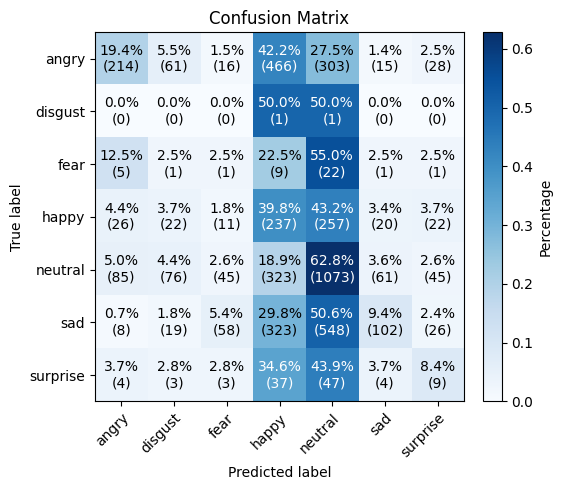

In [42]:
y_test = iemocap['label']
X_test = np.vstack(iemocap_feats['filename'].apply(lambda x: np.fromstring(x.strip("[]"), sep=' ')).values)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

       angry       0.25      0.13      0.17       345
     disgust       0.00      0.00      0.00        68
        fear       0.07      0.02      0.03        50
       happy       0.21      0.14      0.17       402
     neutral       0.52      0.81      0.63      1256
         sad       0.17      0.02      0.03       208
    surprise       0.19      0.09      0.12       281

    accuracy                           0.44      2610
   macro avg       0.20      0.17      0.17      2610
weighted avg       0.35      0.44      0.37      2610



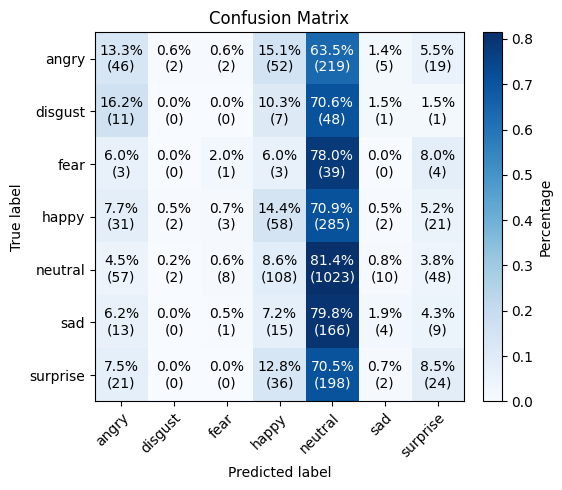

In [43]:
y_test = meld['label']
X_test = np.vstack(meld_feats['filename'].apply(lambda x: np.fromstring(x.strip("[]"), sep=' ')).values)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

### Train on all --> Test IEMOCAP and MELD

In [ ]:
df = pd.concat([emodb, ravdess, tess, crema_d, savee, intspeech], ignore_index=True)
ser_feats = df['filename'].progress_apply(extract_aggregate_audio_features)

# Split e treino
y = df['label']
X = np.vstack([np.array(x) for x in ser_feats])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
print(X_train.shape)

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'long_svm_all.joblib')

  0%|          | 0/13068 [00:00<?, ?it/s]/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/librosa/core/intervals.py:8: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_filename
 70%|███████   | 9154/13068 [04:42<01:44, 37.46it/s]/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
100%|██████████| 13068/13068 [06:26<00:00, 33.85it/s]


(10454, 358)
Fitting 5 folds for each of 18 candidates, totalling 90 fits


/opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See h

[CV] END ...svc__C=0.1, svc__gamma=scale, svc__kernel=linear; total time=  26.5s
[CV] END ...svc__C=0.1, svc__gamma=scale, svc__kernel=linear; total time=  27.1s
[CV] END ...svc__C=0.1, svc__gamma=scale, svc__kernel=linear; total time=  27.1s
[CV] END ...svc__C=0.1, svc__gamma=scale, svc__kernel=linear; total time=  27.3s
[CV] END ...svc__C=0.1, svc__gamma=scale, svc__kernel=linear; total time=  27.5s
[CV] END ......svc__C=0.1, svc__gamma=scale, svc__kernel=rbf; total time=  38.1s
[CV] END ......svc__C=0.1, svc__gamma=scale, svc__kernel=rbf; total time=  38.3s
[CV] END ......svc__C=0.1, svc__gamma=scale, svc__kernel=rbf; total time=  38.5s
[CV] END ......svc__C=0.1, svc__gamma=scale, svc__kernel=rbf; total time=  36.7s
[CV] END ......svc__C=0.1, svc__gamma=scale, svc__kernel=rbf; total time=  36.6s
[CV] END ....svc__C=0.1, svc__gamma=auto, svc__kernel=linear; total time=  25.5s
[CV] END .....svc__C=0.1, svc__gamma=scale, svc__kernel=poly; total time=  38.2s
[CV] END .....svc__C=0.1, sv

['long_svm_all.joblib']

              precision    recall  f1-score   support

       angry       0.82      0.84      0.83       447
     disgust       0.66      0.71      0.69       394
        fear       0.74      0.64      0.68       398
       happy       0.72      0.69      0.70       436
     neutral       0.70      0.74      0.72       375
         sad       0.75      0.78      0.77       434
    surprise       0.93      0.92      0.92       130

    accuracy                           0.74      2614
   macro avg       0.76      0.76      0.76      2614
weighted avg       0.74      0.74      0.74      2614



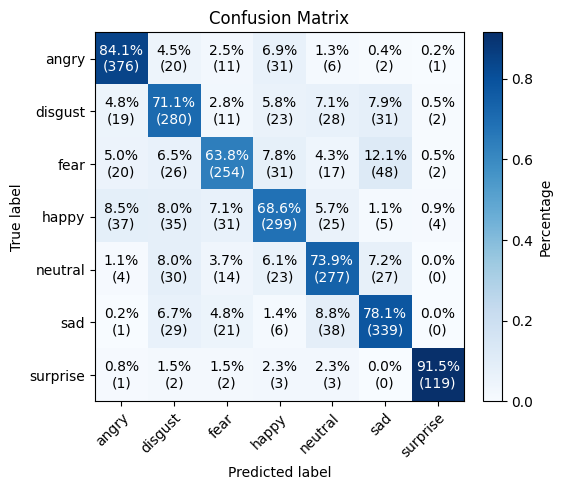

In [8]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

       angry       0.93      0.12      0.21      1103
     disgust       0.00      0.00      0.00         2
        fear       0.01      0.35      0.03        40
       happy       0.10      0.02      0.04       595
     neutral       0.50      0.22      0.30      1708
         sad       0.35      0.73      0.47      1084
    surprise       0.00      0.00      0.00       107

    accuracy                           0.29      4639
   macro avg       0.27      0.21      0.15      4639
weighted avg       0.50      0.29      0.28      4639



/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

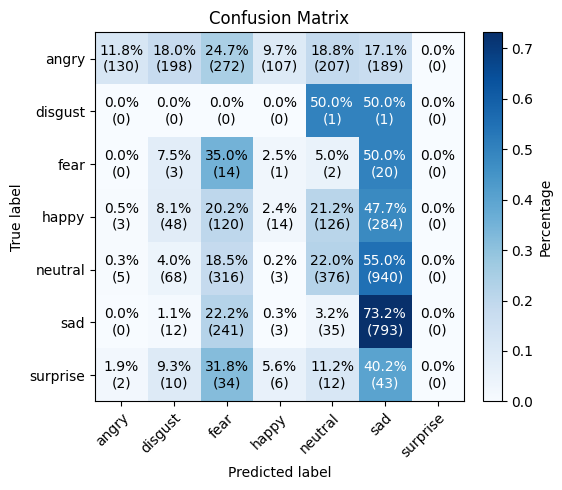

In [10]:
y_test = iemocap['label']
X_test = [extract_aggregate_audio_features(i) for i in iemocap['filename'].tolist()]
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

/var/folders/ry/9hpdp04n0n58r6p626cfk2gh0000gn/T/ipykernel_7549/2247235413.py:52: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=16000)
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/var/folders/ry/9hpdp04n0n58r6p626cfk2gh0000gn/T/ipykernel_7549/2247235413.py:52: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=16000)
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/var/folders

              precision    recall  f1-score   support

       angry       0.20      0.03      0.05       345
     disgust       0.03      0.35      0.06        68
        fear       0.02      0.50      0.04        50
       happy       0.16      0.08      0.11       402
     neutral       0.57      0.17      0.26      1256
         sad       0.12      0.09      0.10       208
    surprise       0.00      0.00      0.00       281

    accuracy                           0.12      2610
   macro avg       0.16      0.17      0.09      2610
weighted avg       0.34      0.12      0.16      2610



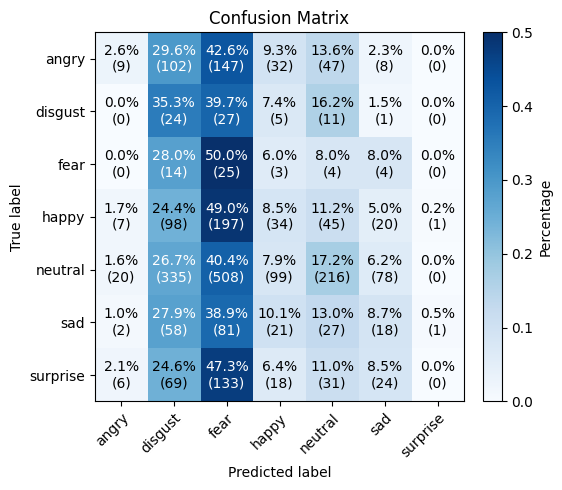

In [13]:
y_test = meld['label']
X_test = [extract_aggregate_audio_features(i) for i in meld['filename'].tolist()]
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

 70%|███████   | 9155/13068 [04:18<01:50, 35.25it/s]/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
100%|██████████| 13068/13068 [06:23<00:00, 34.06it/s]


Alg. 1: Selected top 286 features out of 358 total features.
Alg. 2: Selected 158 features out of 286 total features.
              precision    recall  f1-score   support

       angry       0.80      0.84      0.82       447
     disgust       0.65      0.68      0.66       394
        fear       0.72      0.63      0.67       398
       happy       0.72      0.69      0.70       436
     neutral       0.68      0.73      0.71       375
         sad       0.74      0.75      0.74       434
    surprise       0.93      0.90      0.91       130

    accuracy                           0.73      2614
   macro avg       0.75      0.75      0.75      2614
weighted avg       0.73      0.73      0.73      2614



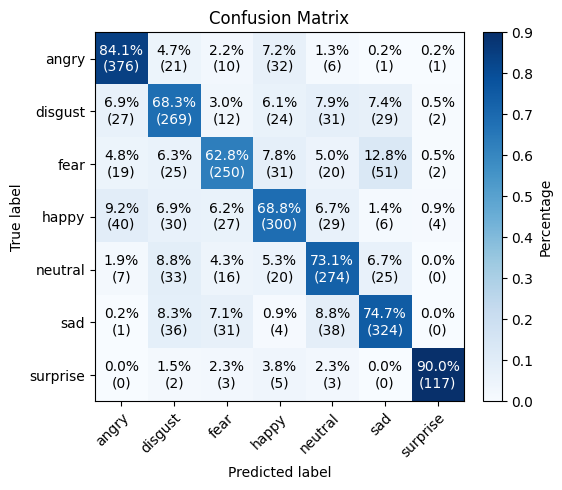

In [ ]:
from src.feature_selection import FeatureSelector

ser_feats = df['filename'].progress_apply(extract_aggregate_audio_features)

# Split e treino
y = df['label']
X = np.vstack([np.array(x) for x in ser_feats])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

pipeline_fs = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection1', FeatureSelector(algorithm="algorithm1", L=0.80, dispersion_measure="MAD", similarity_measure="AC")),
    ('scaler2', StandardScaler()),
    ('feature_selection2', FeatureSelector(algorithm="algorithm2", L=0.95, MS=0.75, dispersion_measure="MAD", similarity_measure="AC")),
    ('svc', SVC(C=10, kernel='rbf', gamma='scale'))
])

model = pipeline_fs.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

       angry       0.94      0.12      0.22      1103
     disgust       0.00      0.00      0.00         2
        fear       0.01      0.50      0.03        40
       happy       0.08      0.02      0.03       595
     neutral       0.51      0.19      0.27      1708
         sad       0.31      0.43      0.36      1084
    surprise       0.00      0.00      0.00       107

    accuracy                           0.21      4639
   macro avg       0.27      0.18      0.13      4639
weighted avg       0.49      0.21      0.24      4639



/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

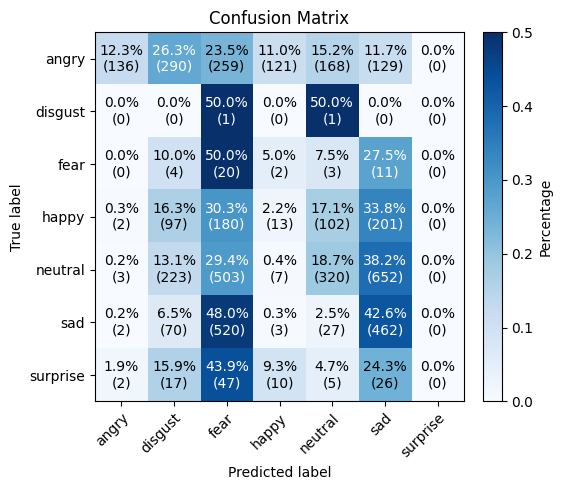

In [15]:
y_test = iemocap['label']
X_test = [extract_aggregate_audio_features(i) for i in iemocap['filename'].tolist()]
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

/var/folders/ry/9hpdp04n0n58r6p626cfk2gh0000gn/T/ipykernel_7549/2247235413.py:52: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=16000)
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/var/folders/ry/9hpdp04n0n58r6p626cfk2gh0000gn/T/ipykernel_7549/2247235413.py:52: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=16000)
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/var/folders

              precision    recall  f1-score   support

       angry       0.16      0.04      0.07       345
     disgust       0.03      0.34      0.06        68
        fear       0.03      0.56      0.05        50
       happy       0.11      0.04      0.06       402
     neutral       0.50      0.14      0.22      1256
         sad       0.13      0.15      0.14       208
    surprise       0.00      0.00      0.00       281

    accuracy                           0.11      2610
   macro avg       0.14      0.18      0.09      2610
weighted avg       0.29      0.11      0.14      2610



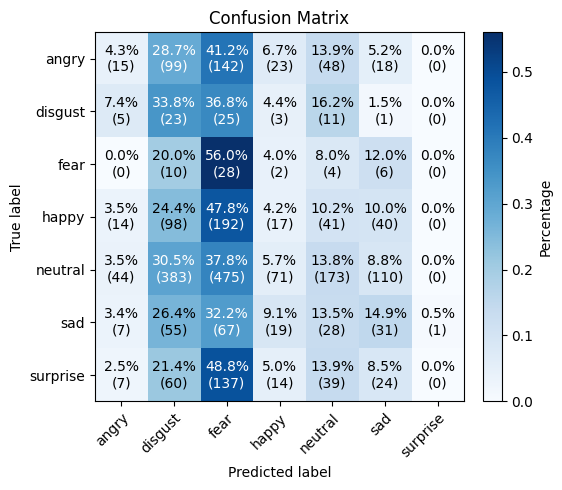

In [16]:
y_test = meld['label']
X_test = [extract_aggregate_audio_features(i) for i in meld['filename'].tolist()]
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

       angry       0.37      0.75      0.49       127
     disgust       0.00      0.00      0.00        46
        fear       0.43      0.04      0.08        69
       happy       0.17      0.38      0.23        71
     neutral       0.00      0.00      0.00        79
         sad       0.00      0.00      0.00        62
    surprise       0.00      0.00      0.00         0

    accuracy                           0.28       454
   macro avg       0.14      0.17      0.12       454
weighted avg       0.19      0.28      0.19       454



/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

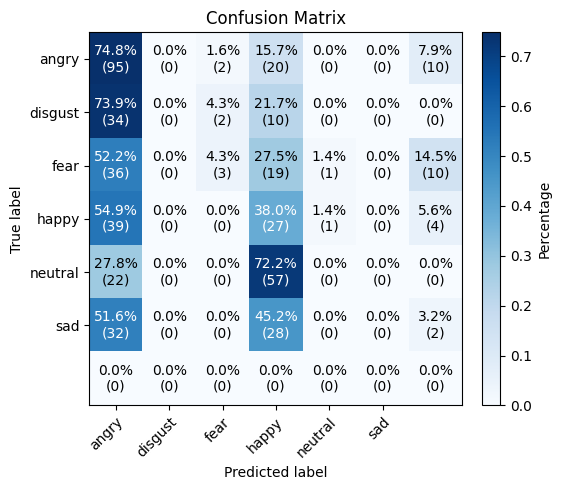

In [44]:
import joblib
best_model = joblib.load('long_svm_RCSInM.joblib')
y_test = emodb['label']
X_test = np.vstack(emodb_feats['filename'].apply(lambda x: np.fromstring(x.strip("[]"), sep=' ')).values)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

Test all on TESS

              precision    recall  f1-score   support

       angry       0.46      0.19      0.27       400
     disgust       0.78      0.34      0.47       400
        fear       0.31      0.06      0.09       400
       happy       0.10      0.36      0.16       400
     neutral       0.52      0.39      0.45       400
         sad       0.14      0.15      0.14       400
    surprise       0.47      0.27      0.34       400

    accuracy                           0.25      2800
   macro avg       0.40      0.25      0.27      2800
weighted avg       0.40      0.25      0.27      2800



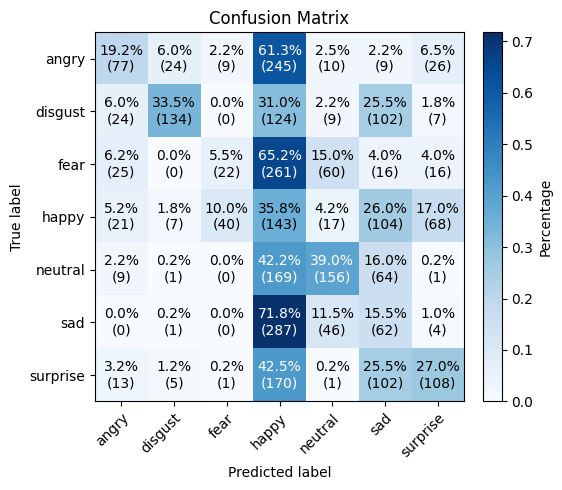

In [45]:
y_test = tess['label']
X_test = np.vstack(tess_feats['filename'].apply(lambda x: np.fromstring(x.strip("[]"), sep=' ')).values)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

### Emo-DB

In [16]:
X = np.vstack(emodb_feats['filename'].apply(lambda x: np.fromstring(x.strip("[]"), sep=' ')).values)
# Split e treino
y = emodb['label']
#X = np.vstack([np.array(x) for x in ser_feats])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
print(X_train.shape)

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'long_svm_emodb.joblib')



(363, 358)
Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ...svc__C=0.1, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END ...svc__C=0.1, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END ...svc__C=0.1, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END ...svc__C=0.1, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END ...svc__C=0.1, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END ......svc__C=0.1, svc__gamma=scale, svc__kernel=rbf; total time=   0.0s
[CV] END ......svc__C=0.1, svc__gamma=scale, svc__kernel=rbf; total time=   0.0s
[CV] END ......svc__C=0.1, svc__gamma=scale, svc__kernel=rbf; total time=   0.0s
[CV] END ......svc__C=0.1, svc__gamma=scale, svc__kernel=rbf; total time=   0.0s
[CV] END ......svc__C=0.1, svc__gamma=scale, svc__kernel=rbf; total time=   0.0s
[CV] END .....svc__C=0.1, svc__gamma=scale, svc__kernel=poly; total time=   0.0s
[CV] END .....svc__C=0.1, svc__gamma=

['long_svm_emodb.joblib']

              precision    recall  f1-score   support

       angry       0.81      0.85      0.83        26
     disgust       0.80      0.89      0.84         9
        fear       1.00      0.79      0.88        14
       happy       0.77      0.71      0.74        14
     neutral       0.88      0.94      0.91        16
         sad       0.92      1.00      0.96        12

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



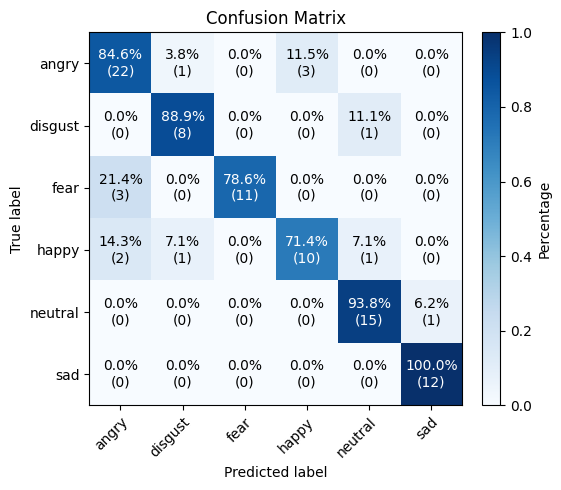

In [17]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

Alg. 1: Selected top 322 features out of 358 total features.
Alg. 2: Selected 289 features out of 322 total features.
              precision    recall  f1-score   support

       angry       0.81      0.96      0.88        26
     disgust       0.80      0.89      0.84         9
        fear       1.00      0.64      0.78        14
       happy       0.82      0.64      0.72        14
     neutral       1.00      0.94      0.97        16
         sad       0.80      1.00      0.89        12

    accuracy                           0.86        91
   macro avg       0.87      0.85      0.85        91
weighted avg       0.87      0.86      0.85        91



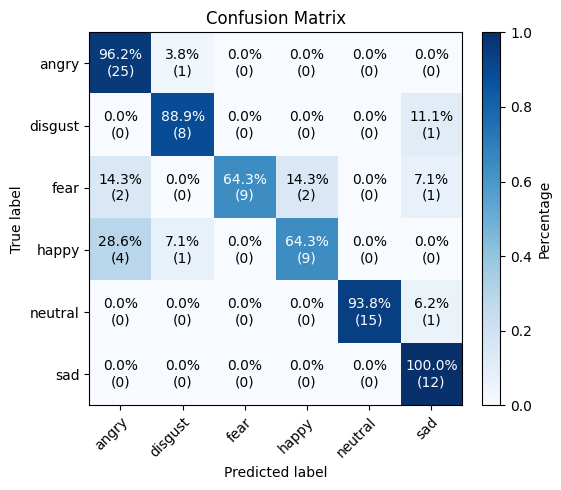

In [19]:
from src.feature_selection import FeatureSelector

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection1', FeatureSelector(algorithm="algorithm1", L=0.90, dispersion_measure="MM", similarity_measure="AC")),
    ('scaler2', StandardScaler()),
    ('feature_selection2', FeatureSelector(algorithm="algorithm2", L=0.90, MS=0.8, dispersion_measure="MM", similarity_measure="AC")),
    ('svc', SVC(C=10, kernel='rbf', gamma='scale'))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

       angry       0.78      0.21      0.33      1103
     disgust       0.00      0.00      0.00         2
        fear       0.08      0.03      0.04        40
       happy       0.08      0.03      0.04       595
     neutral       0.46      0.49      0.48      1708
         sad       0.41      0.86      0.55      1084
    surprise       0.00      0.00      0.00       107

    accuracy                           0.44      4639
   macro avg       0.26      0.23      0.21      4639
weighted avg       0.46      0.44      0.39      4639



/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

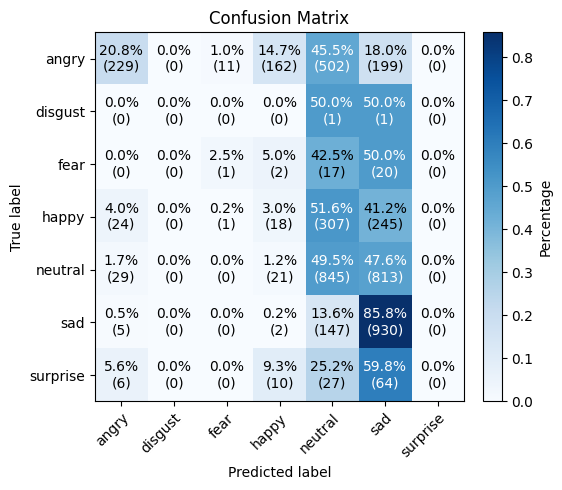

In [20]:
y_test = iemocap['label']
X_test = np.vstack(iemocap_feats['filename'].apply(lambda x: np.fromstring(x.strip("[]"), sep=' ')).values)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

       angry       0.24      0.09      0.13       345
     disgust       0.00      0.00      0.00        68
        fear       0.04      0.02      0.03        50
       happy       0.15      0.42      0.22       402
     neutral       0.50      0.37      0.42      1256
         sad       0.10      0.22      0.14       208
    surprise       0.00      0.00      0.00       281

    accuracy                           0.27      2610
   macro avg       0.15      0.16      0.13      2610
weighted avg       0.30      0.27      0.27      2610



/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

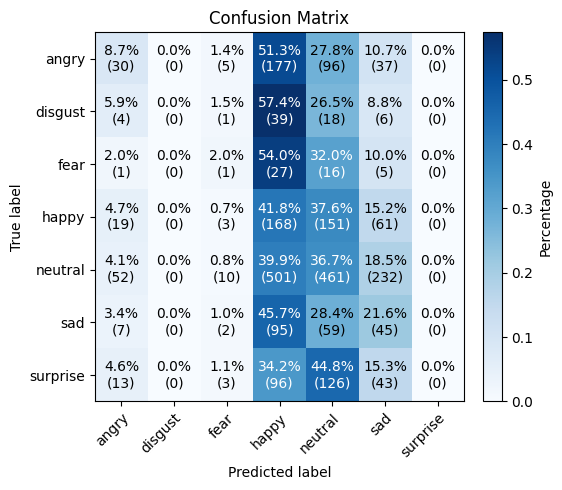

In [21]:
y_test = meld['label']
X_test = np.vstack(meld_feats['filename'].apply(lambda x: np.fromstring(x.strip("[]"), sep=' ')).values)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

       angry       0.36      0.63      0.46       184
       happy       0.28      0.49      0.36       184
     neutral       0.00      0.00      0.00        92
         sad       0.50      0.01      0.01       184

    accuracy                           0.32       644
   macro avg       0.29      0.28      0.21       644
weighted avg       0.33      0.32      0.24       644



/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

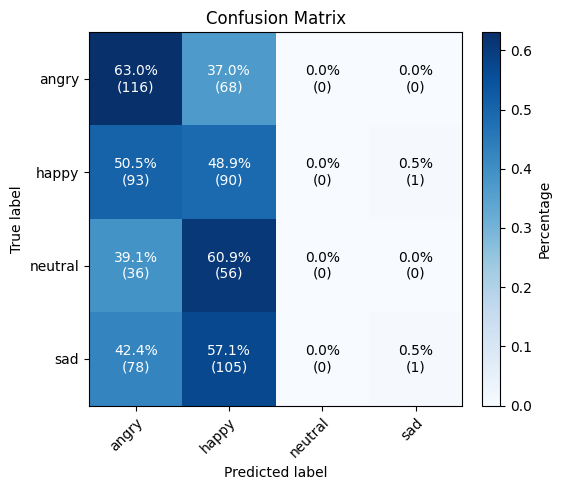

In [25]:
y_test = intspeech['label']
X_test = np.vstack(intspeech_feats['filename'].apply(lambda x: np.fromstring(x.strip("[]"), sep=' ')).values)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

### IEMOCAP

In [27]:
ser_feats = iemocap['filename'].progress_apply(extract_aggregate_audio_features)

# Split e treino
y = iemocap['label']
X = np.vstack([np.array(x) for x in ser_feats])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
print(X_train.shape)

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'long_svm_iemocap.joblib')

  0%|          | 0/4639 [00:00<?, ?it/s]

100%|██████████| 4639/4639 [06:11<00:00, 12.49it/s]

(3711, 358)
Fitting 5 folds for each of 18 candidates, totalling 90 fits



/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Alg. 1: Selected top 322 features out of 358 total features.
Alg. 1: Selected top 322 features out of 358 total features.
Alg. 1: Selected top 322 features out of 358 total features.
Alg. 1: Selected top 322 features out of 358 total features.
Alg. 1: Selected top 322 features out of 358 total features.
Alg. 1: Selected top 322 features out of 358 total features.
Alg. 1: Selected top 322 features out of 358 total features.
Alg. 1: Selected top 322 features out of 358 total features.
Alg. 1: Selected top 322 features out of 358 total features.
Alg. 1: Selected top 322 features out of 358 total features.
Alg. 1: Selected top 322 features out of 358 total features.
Alg. 1: Selected top 322 features out of 358 total features.
Alg. 2: Selected 219 features out of 322 total features.
Alg. 2: Selected 219 features out of 322 total features.
Alg. 2: Selected 229 features out of 322 total features.
Alg. 2: Selected 236 features out of 322 total features.
Alg. 2: Selected 233 features out of 322

['long_svm_iemocap.joblib']

              precision    recall  f1-score   support

       angry       0.65      0.92      0.76        12
     disgust       1.00      0.67      0.80        12
        fear       0.70      0.58      0.64        12
       happy       0.86      0.50      0.63        12
     neutral       0.85      0.96      0.90        24
         sad       0.77      0.83      0.80        12
    surprise       0.57      0.67      0.62        12

    accuracy                           0.76        96
   macro avg       0.77      0.73      0.73        96
weighted avg       0.78      0.76      0.76        96



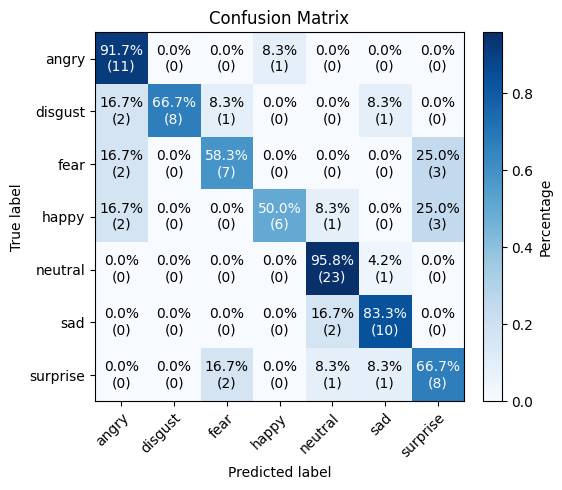

In [32]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

Alg. 1: Selected top 286 features out of 358 total features.
Alg. 2: Selected 193 features out of 286 total features.
              precision    recall  f1-score   support

       angry       0.67      1.00      0.80        12
     disgust       0.77      0.83      0.80        12
        fear       0.62      0.67      0.64        12
       happy       0.78      0.58      0.67        12
     neutral       0.96      0.96      0.96        24
         sad       1.00      0.92      0.96        12
    surprise       0.75      0.50      0.60        12

    accuracy                           0.80        96
   macro avg       0.79      0.78      0.77        96
weighted avg       0.81      0.80      0.80        96



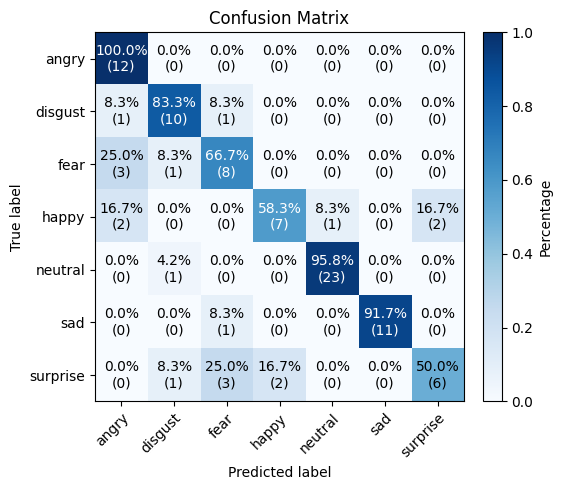

In [37]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection1', FeatureSelector(algorithm="algorithm1", L=0.80, dispersion_measure="MAD", similarity_measure="AC")),
    ('scaler2', StandardScaler()),
    ('feature_selection2', FeatureSelector(algorithm="algorithm2", L=0.95, MS=0.75, dispersion_measure="MAD", similarity_measure="AC")),
    ('svc', SVC(C=10, kernel='rbf', gamma='scale'))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

### SAVEE

In [38]:
ser_feats = savee['filename'].progress_apply(extract_aggregate_audio_features)

# Split e treino
y = savee['label']
X = np.vstack([np.array(x) for x in ser_feats])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
print(X_train.shape)

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'long_svm_savee.joblib')


100%|██████████| 480/480 [00:40<00:00, 11.79it/s]

(384, 358)
Fitting 5 folds for each of 18 candidates, totalling 90 fits


Alg. 1: Selected top 286 features out of 358 total features.
Alg. 1: Selected top 286 features out of 358 total features.
Alg. 1: Selected top 286 features out of 358 total features.
Alg. 1: Selected top 286 features out of 358 total features.
Alg. 1: Selected top 286 features out of 358 total features.
Alg. 1: Selected top 286 features out of 358 total features.
Alg. 1: Selected top 286 features out of 358 total features.
Alg. 1: Selected top 286 features out of 358 total features.
Alg. 1: Selected top 286 features out of 358 total features.
Alg. 1: Selected top 286 features out of 358 total features.
Alg. 1: Selected top 286 features out of 358 total features.
Alg. 1: Selected top 286 features out of 358 total features.
Alg. 2: Selected 181 features out of 286 total features.
Alg. 2: Selected 211 features out of 286 total features.
Alg. 2: Selected 192 features out of 286 total features.
Alg. 2: Selected 192 features out of 286 total features.
Alg. 2: Selected 179 features out of 286

['long_svm_savee.joblib']

              precision    recall  f1-score   support

       angry       0.67      1.00      0.80        12
     disgust       0.77      0.83      0.80        12
        fear       0.62      0.67      0.64        12
       happy       0.78      0.58      0.67        12
     neutral       0.96      0.96      0.96        24
         sad       1.00      0.92      0.96        12
    surprise       0.75      0.50      0.60        12

    accuracy                           0.80        96
   macro avg       0.79      0.78      0.77        96
weighted avg       0.81      0.80      0.80        96



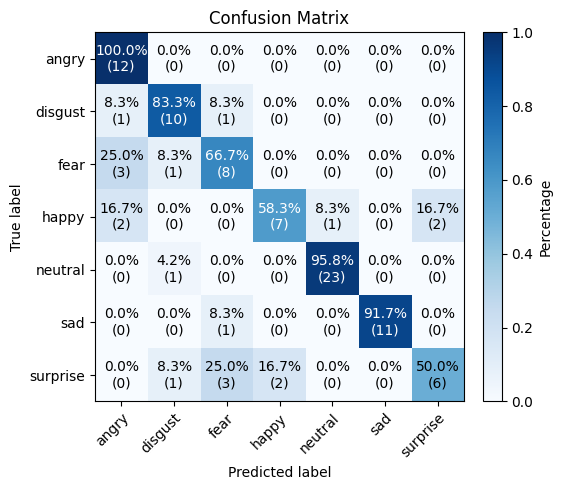

In [39]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

Alg. 1: Selected top 286 features out of 358 total features.
Alg. 2: Selected 193 features out of 286 total features.
              precision    recall  f1-score   support

       angry       0.67      1.00      0.80        12
     disgust       0.77      0.83      0.80        12
        fear       0.62      0.67      0.64        12
       happy       0.78      0.58      0.67        12
     neutral       0.96      0.96      0.96        24
         sad       1.00      0.92      0.96        12
    surprise       0.75      0.50      0.60        12

    accuracy                           0.80        96
   macro avg       0.79      0.78      0.77        96
weighted avg       0.81      0.80      0.80        96



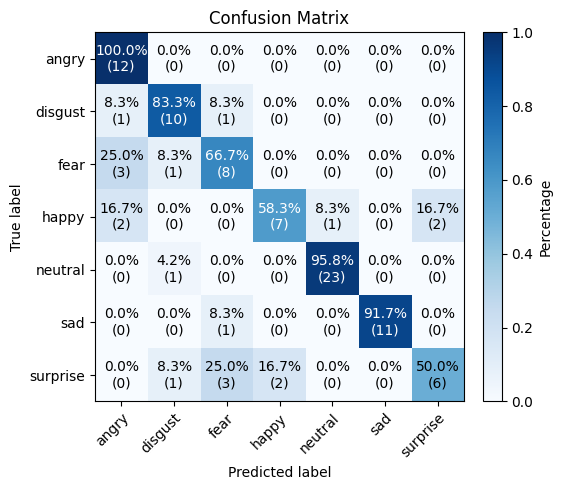

In [40]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection1', FeatureSelector(algorithm="algorithm1", L=0.80, dispersion_measure="MAD", similarity_measure="AC")),
    ('scaler2', StandardScaler()),
    ('feature_selection2', FeatureSelector(algorithm="algorithm2", L=0.95, MS=0.75, dispersion_measure="MAD", similarity_measure="AC")),
    ('svc', SVC(C=10, kernel='rbf', gamma='scale'))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

### RAVDESS

In [41]:
ser_feats = ravdess['filename'].progress_apply(extract_aggregate_audio_features)

# Split e treino
y = ravdess['label']
X = np.vstack([np.array(x) for x in ser_feats])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
print(X_train.shape)

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'long_svm_ravdess.joblib')

100%|██████████| 1248/1248 [01:35<00:00, 13.06it/s]

(998, 358)
Fitting 5 folds for each of 18 candidates, totalling 90 fits


Alg. 1: Selected top 286 features out of 358 total features.
Alg. 1: Selected top 286 features out of 358 total features.
Alg. 1: Selected top 286 features out of 358 total features.
Alg. 1: Selected top 286 features out of 358 total features.
Alg. 1: Selected top 286 features out of 358 total features.
Alg. 1: Selected top 286 features out of 358 total features.
Alg. 1: Selected top 286 features out of 358 total features.
Alg. 1: Selected top 286 features out of 358 total features.
Alg. 1: Selected top 286 features out of 358 total features.
Alg. 1: Selected top 286 features out of 358 total features.
Alg. 1: Selected top 286 features out of 358 total features.
Alg. 1: Selected top 286 features out of 358 total features.
Alg. 2: Selected 217 features out of 286 total features.
Alg. 2: Selected 217 features out of 286 total features.
Alg. 2: Selected 219 features out of 286 total features.
Alg. 2: Selected 216 features out of 286 total features.
Alg. 2: Selected 216 features out of 286

['long_svm_ravdess.joblib']

              precision    recall  f1-score   support

       angry       0.88      0.92      0.90        38
     disgust       0.75      0.79      0.77        38
        fear       0.85      0.74      0.79        39
       happy       0.78      0.72      0.75        39
     neutral       0.59      0.68      0.63        19
         sad       0.69      0.64      0.67        39
    surprise       0.83      0.92      0.88        38

    accuracy                           0.78       250
   macro avg       0.77      0.77      0.77       250
weighted avg       0.78      0.78      0.78       250



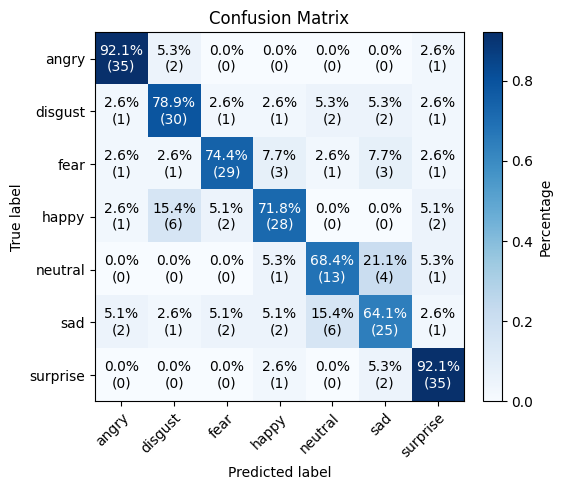

In [42]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

Alg. 1: Selected top 286 features out of 358 total features.
Alg. 2: Selected 221 features out of 286 total features.
              precision    recall  f1-score   support

       angry       0.88      0.92      0.90        38
     disgust       0.75      0.79      0.77        38
        fear       0.85      0.74      0.79        39
       happy       0.78      0.72      0.75        39
     neutral       0.59      0.68      0.63        19
         sad       0.69      0.64      0.67        39
    surprise       0.83      0.92      0.88        38

    accuracy                           0.78       250
   macro avg       0.77      0.77      0.77       250
weighted avg       0.78      0.78      0.78       250



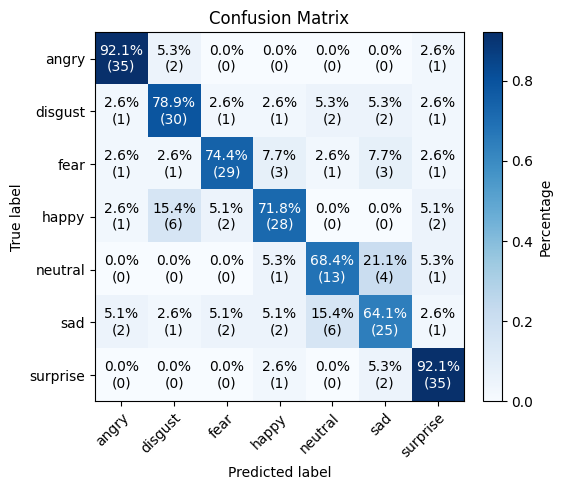

In [43]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection1', FeatureSelector(algorithm="algorithm1", L=0.80, dispersion_measure="MAD", similarity_measure="AC")),
    ('scaler2', StandardScaler()),
    ('feature_selection2', FeatureSelector(algorithm="algorithm2", L=0.95, MS=0.75, dispersion_measure="MAD", similarity_measure="AC")),
    ('svc', SVC(C=10, kernel='rbf', gamma='scale'))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

### Interspeech

100%|██████████| 644/644 [00:56<00:00, 11.43it/s]


(515, 358)
Performance SVM with feature scaling
               precision    recall  f1-score   support

       angry       0.97      0.97      0.97        37
       happy       0.97      0.97      0.97        37
     neutral       0.95      1.00      0.97        18
         sad       1.00      0.97      0.99        37

    accuracy                           0.98       129
   macro avg       0.97      0.98      0.98       129
weighted avg       0.98      0.98      0.98       129



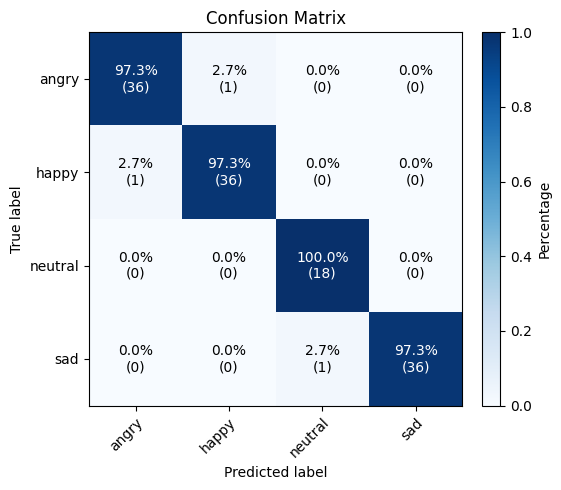

In [ ]:
ser_feats = intspeech['filename'].progress_apply(extract_aggregate_audio_features)

# Split e treino
y = intspeech['label']
X = np.vstack([np.array(x) for x in ser_feats])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
print(X_train.shape)

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'long_svm_interspeech.joblib')

### CREMA-D

In [ ]:
ser_feats = crema_d['filename'].progress_apply(extract_aggregate_audio_features)

# Split e treino
y = crema_d['label']
X = np.vstack([np.array(x) for x in ser_feats])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
print(X_train.shape)


grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'long_svm_cremad.joblib')


 63%|██████▎   | 4654/7442 [04:10<02:21, 19.77it/s]/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
100%|██████████| 7442/7442 [06:48<00:00, 18.20it/s]


(5953, 358)
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Alg. 1: Selected top 286 features out of 358 total features.
Alg. 1: Selected top 286 features out of 358 total features.
Alg. 2: Selected 155 features out of 286 total features.
Alg. 2: Selected 151 features out of 286 total features.
Alg. 1: Selected top 286 features out of 358 total features.
Alg. 1: Selected top 286 features out of 358 total features.
Alg. 2: Selected 143 features out of 286 total features.
Alg. 2: Selected 168 features out of 286 total features.
Alg. 1: Selected top 286 features out of 358 total features.
Alg. 1: Selected top 286 features out of 358 total features.
Alg. 1: Selected top 286 features out of 358 total features.
Alg. 2: Selected 148 features out of 286 total features.
Alg. 1: Selected top 286 features out of 358 total features.
Alg. 1: Selected top 286 features out of 358 total features.
Alg. 2: Selected 155 features out of 286 total features.
Alg. 1: Selected top 286 features ou

In [13]:
# perform grid search and save best model with joblib
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import joblib

param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__gamma': ['scale', 'auto']
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'best_svm_model.joblib')

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ...svc__C=0.1, svc__gamma=scale, svc__kernel=linear; total time=  44.0s
[CV] END ...svc__C=0.1, svc__gamma=scale, svc__kernel=linear; total time=  44.3s
[CV] END ...svc__C=0.1, svc__gamma=scale, svc__kernel=linear; total time=  44.6s
[CV] END ...svc__C=0.1, svc__gamma=scale, svc__kernel=linear; total time=  44.8s
[CV] END ...svc__C=0.1, svc__gamma=scale, svc__kernel=linear; total time=  44.8s
[CV] END .....svc__C=0.1, svc__gamma=scale, svc__kernel=poly; total time=  52.8s
[CV] END .....svc__C=0.1, svc__gamma=scale, svc__kernel=poly; total time=  53.3s
[CV] END ......svc__C=0.1, svc__gamma=scale, svc__kernel=rbf; total time=  54.3s
[CV] END ......svc__C=0.1, svc__gamma=scale, svc__kernel=rbf; total time=  54.5s
[CV] END ......svc__C=0.1, svc__gamma=scale, svc__kernel=rbf; total time=  54.4s
[CV] END ......svc__C=0.1, svc__gamma=scale, svc__kernel=rbf; total time=  54.5s
[CV] END ......svc__C=0.1, svc__gamma=scale, svc

['best_svm_model.joblib']

              precision    recall  f1-score   support

       angry       0.73      0.81      0.77       254
     disgust       0.53      0.52      0.53       254
        fear       0.56      0.55      0.55       254
       happy       0.63      0.58      0.60       255
     neutral       0.60      0.60      0.60       218
         sad       0.64      0.65      0.64       254

    accuracy                           0.62      1489
   macro avg       0.61      0.62      0.61      1489
weighted avg       0.61      0.62      0.62      1489



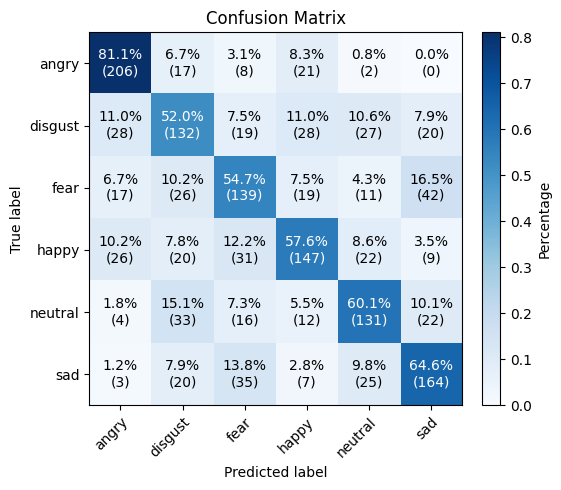

In [ ]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

Alg. 1: Selected top 286 features out of 358 total features.
Alg. 2: Selected 157 features out of 286 total features.
              precision    recall  f1-score   support

       angry       0.66      0.77      0.71       254
     disgust       0.47      0.49      0.48       254
        fear       0.57      0.50      0.53       254
       happy       0.53      0.51      0.52       255
     neutral       0.55      0.52      0.54       218
         sad       0.61      0.60      0.60       254

    accuracy                           0.57      1489
   macro avg       0.56      0.57      0.56      1489
weighted avg       0.56      0.57      0.56      1489



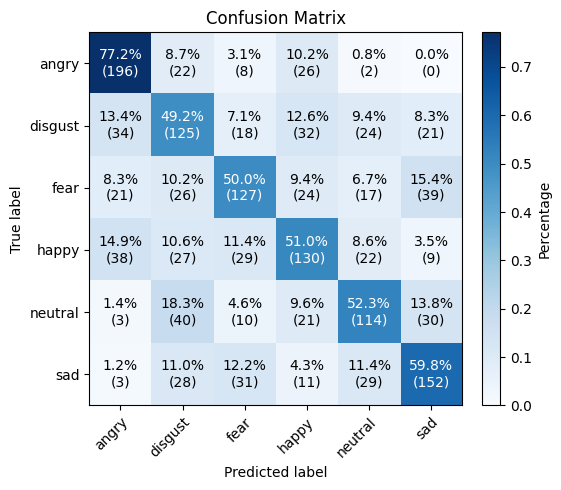

In [ ]:
from src.feature_selection import FeatureSelector

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection1', FeatureSelector(algorithm="algorithm1", L=0.80, dispersion_measure="MAD", similarity_measure="AC")),
    ('scaler2', StandardScaler()),
    ('feature_selection2', FeatureSelector(algorithm="algorithm2", L=0.95, MS=0.75, dispersion_measure="MAD", similarity_measure="AC")),
    ('svc', SVC(C=10, kernel='rbf', gamma='scale'))
])


model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

## Error analysis


🔉 File: /Users/sofiafernandes/.cache/kagglehub/datasets/piyushagni5/berlin-database-of-emotional-speech-emodb/versions/1/wav/16b10Aa.wav
❌ Predicted: sad | ✅ True: fear


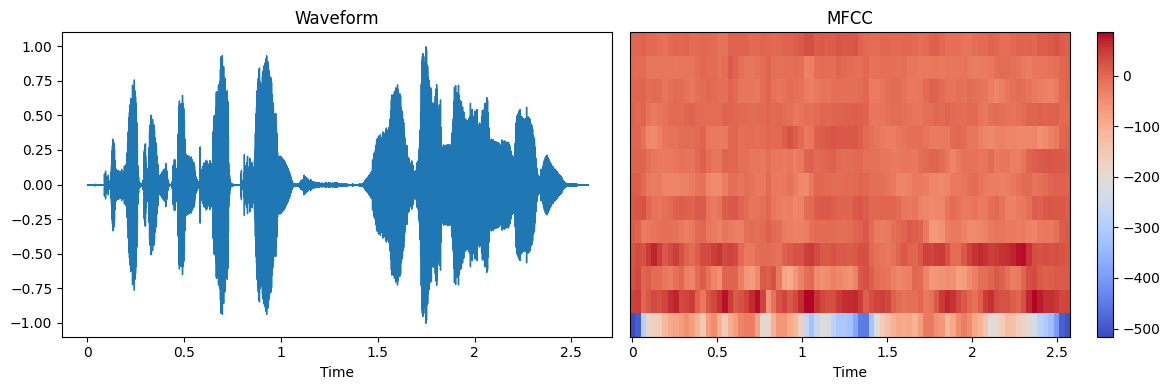


🔉 File: /Users/sofiafernandes/.cache/kagglehub/datasets/piyushagni5/berlin-database-of-emotional-speech-emodb/versions/1/wav/16a02Ea.wav
❌ Predicted: angry | ✅ True: disgust


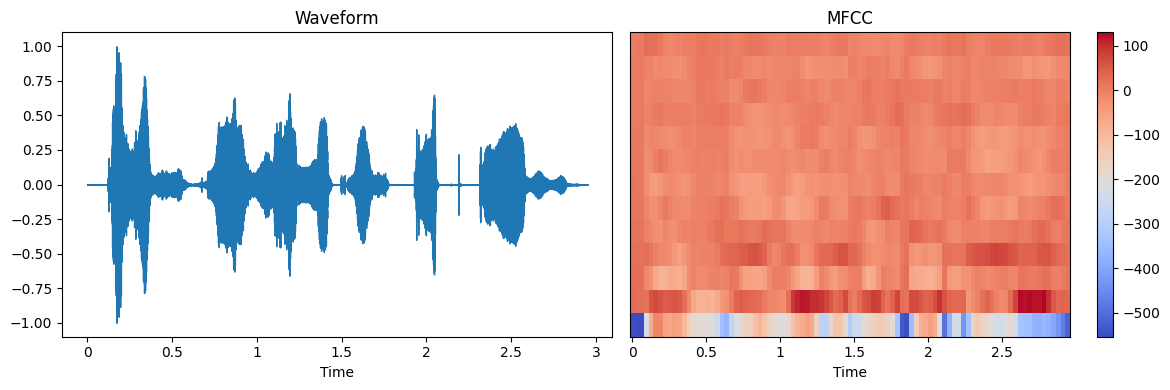


🔉 File: /Users/sofiafernandes/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS/OAF_neutral/OAF_late_neutral.wav
❌ Predicted: fear | ✅ True: neutral


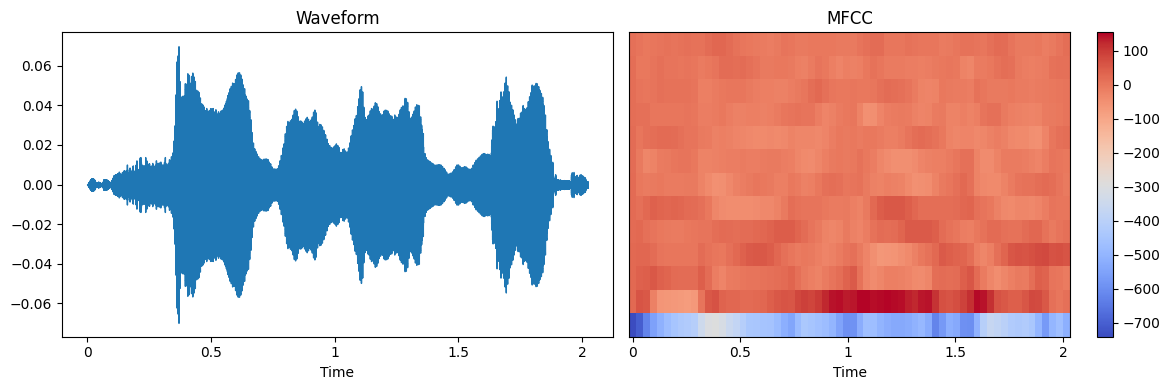


🔉 File: /Users/sofiafernandes/.cache/kagglehub/datasets/piyushagni5/berlin-database-of-emotional-speech-emodb/versions/1/wav/11a05Wd.wav
❌ Predicted: fear | ✅ True: angry


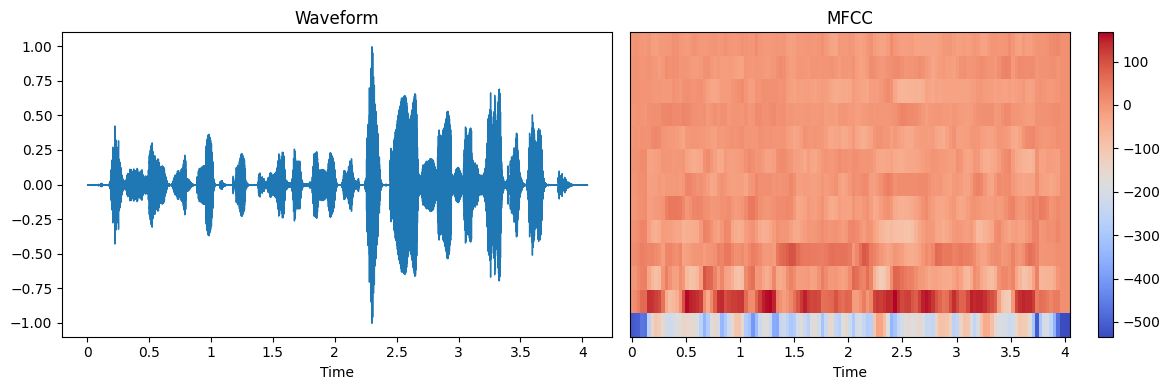


🔉 File: /Users/sofiafernandes/.cache/kagglehub/datasets/piyushagni5/berlin-database-of-emotional-speech-emodb/versions/1/wav/09b03Fd.wav
❌ Predicted: calm | ✅ True: happy


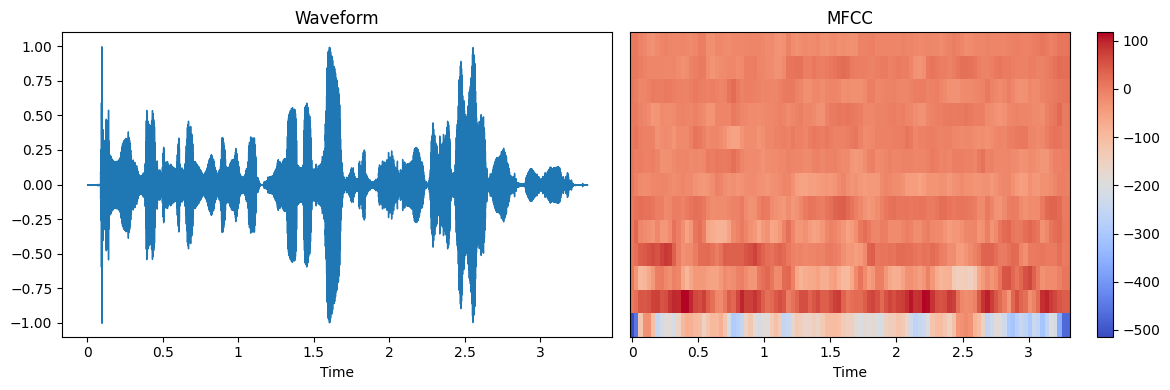


🔉 File: /Users/sofiafernandes/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1/audio_speech_actors_01-24/Actor_03/03-01-05-01-02-01-03.wav
❌ Predicted: disgust | ✅ True: angry


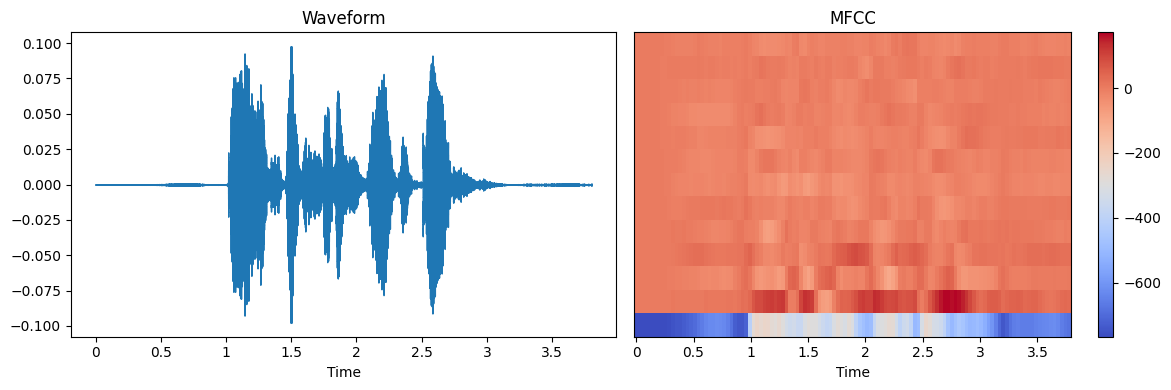


🔉 File: /Users/sofiafernandes/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1/audio_speech_actors_01-24/Actor_08/03-01-04-01-01-01-08.wav
❌ Predicted: fear | ✅ True: sad


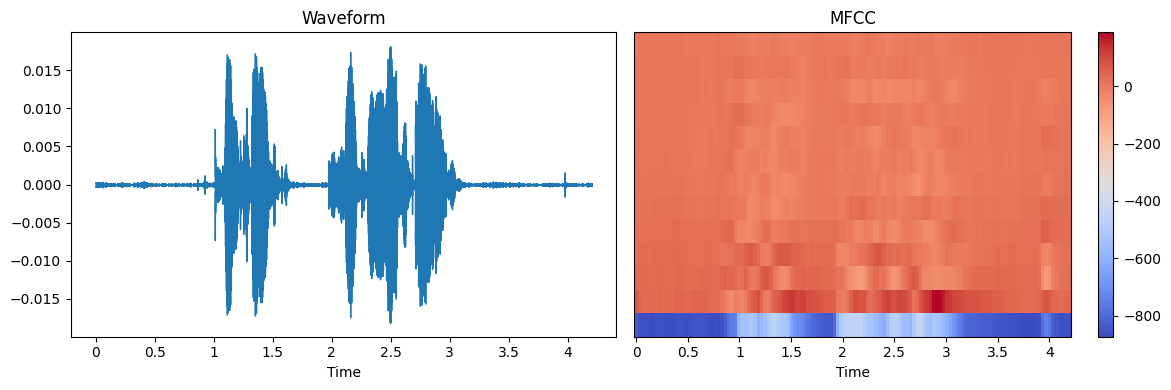


🔉 File: /Users/sofiafernandes/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1/audio_speech_actors_01-24/Actor_12/03-01-04-01-02-02-12.wav
❌ Predicted: fear | ✅ True: sad


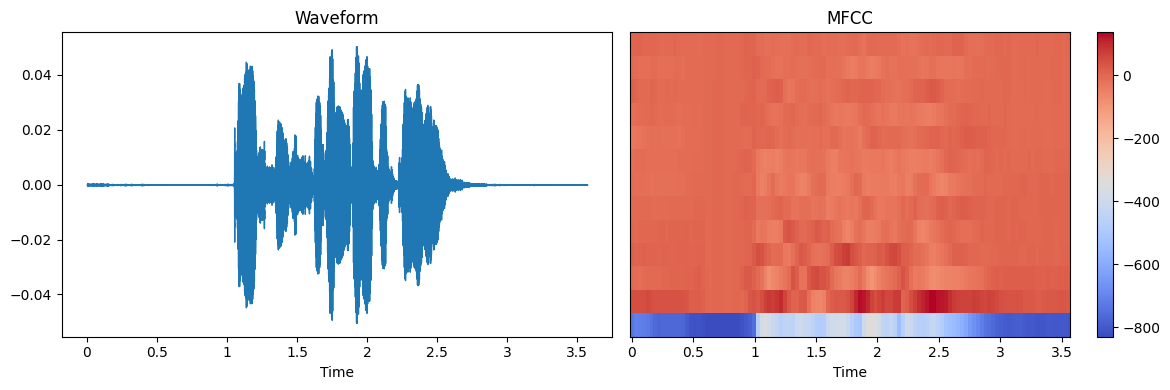


🔉 File: /Users/sofiafernandes/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS/OAF_disgust/OAF_hate_disgust.wav
❌ Predicted: angry | ✅ True: disgust


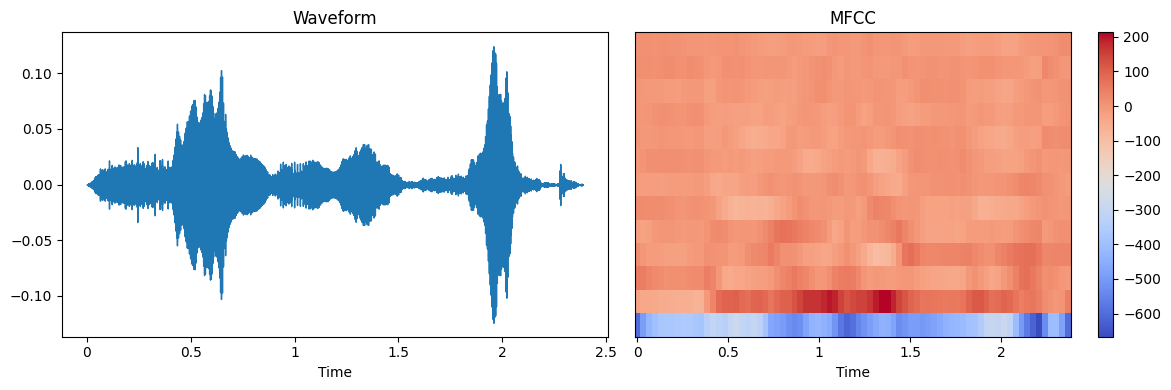


🔉 File: /Users/sofiafernandes/.cache/kagglehub/datasets/piyushagni5/berlin-database-of-emotional-speech-emodb/versions/1/wav/15a04Nc.wav
❌ Predicted: disgust | ✅ True: neutral


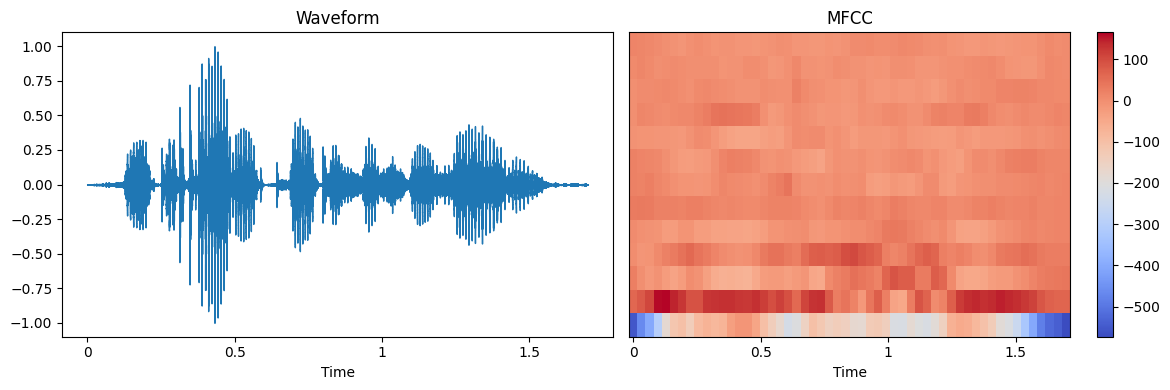


🔉 File: /Users/sofiafernandes/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS/OAF_Sad/OAF_late_sad.wav
❌ Predicted: boredom | ✅ True: sad


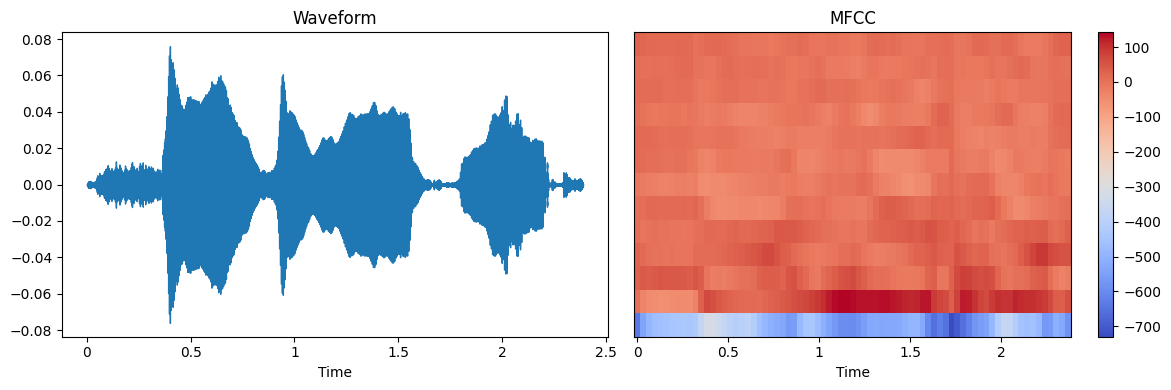


🔉 File: /Users/sofiafernandes/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS/YAF_sad/YAF_ditch_sad.wav
❌ Predicted: neutral | ✅ True: sad


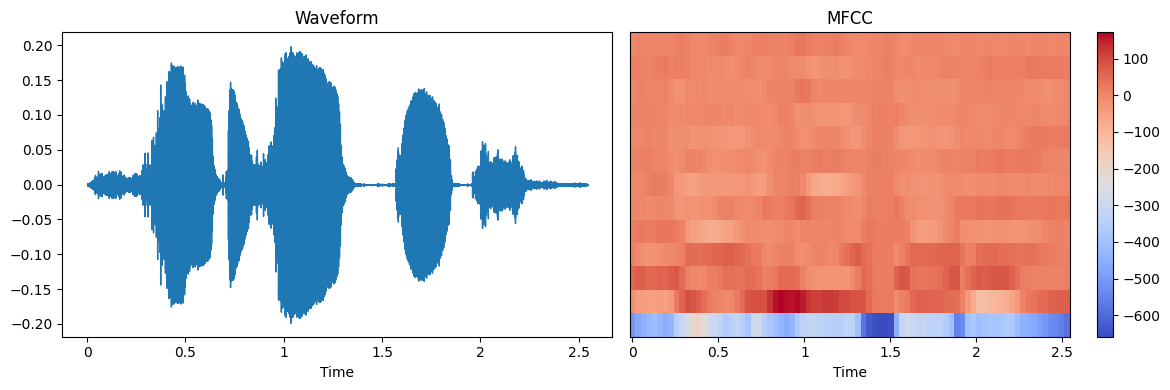


🔉 File: /Users/sofiafernandes/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS/OAF_Fear/OAF_walk_fear.wav
❌ Predicted: angry | ✅ True: fear


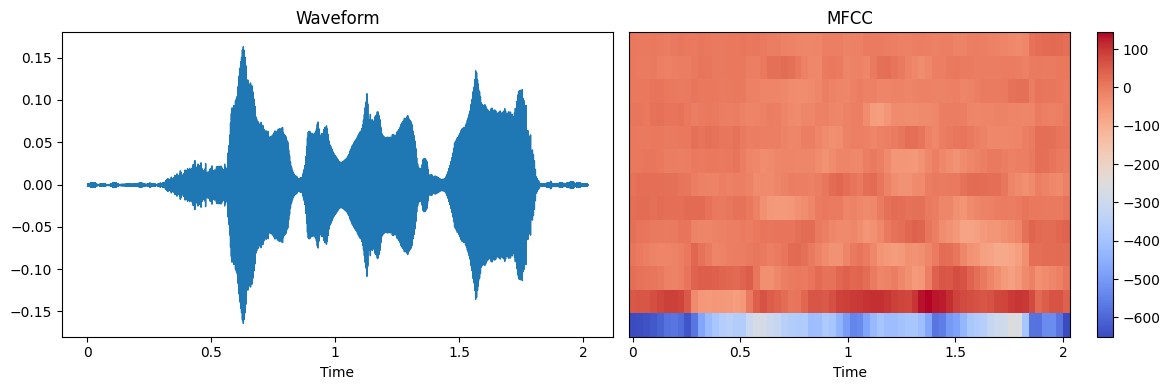


🔉 File: /Users/sofiafernandes/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS/YAF_neutral/YAF_learn_neutral.wav
❌ Predicted: boredom | ✅ True: neutral


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7ff31110a940>>
Traceback (most recent call last):
  File "/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


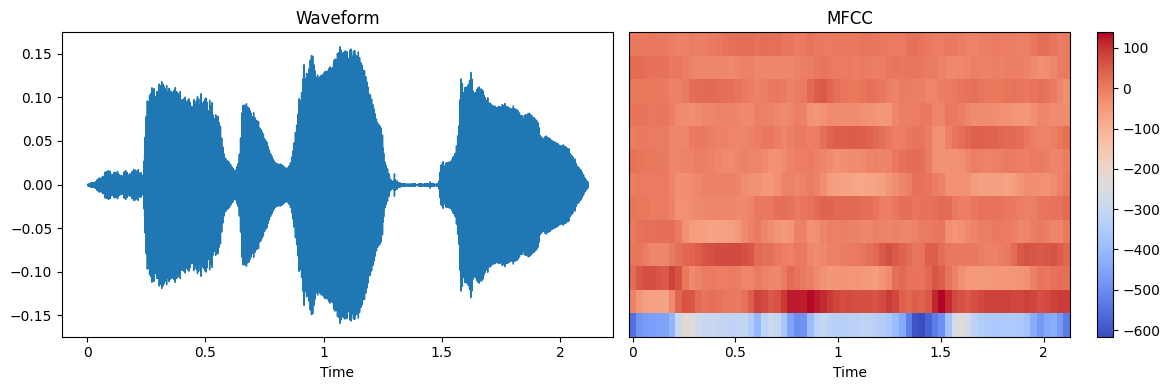

In [ ]:
import os
from IPython.display import Audio, display
import librosa
import librosa.display
import matplotlib.pyplot as plt

error_logs = []

# Find misclassified indices
errors = (pred_test != y_test)

for idx in y_test[errors].index:
    true_label = y_test.iloc[idx]
    pred_label = pred_test.iloc[idx]
    filename = filenames_test.iloc[idx]

    # Load audio
    y, sr = librosa.load(filename, sr=16000)

    # Display prediction details
    print(f"\n🔉 File: {filename}")
    print(f"❌ Predicted: {pred_label} | ✅ True: {true_label}")
    display(Audio(y, rate=sr))

    # Plot waveform and MFCCs
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title("Waveform")

    plt.subplot(1, 2, 2)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    librosa.display.specshow(mfcc, x_axis='time', sr=sr)
    plt.colorbar()
    plt.title("MFCC")
    plt.tight_layout()
    plt.show()

    # Write observation
    observation = input("📝 Your observation (e.g., low volume, hard to distinguish): ")
    error_logs.append({
        "filename": filename,
        "true_label": true_label,
        "predicted_label": pred_label,
        "observation": observation
    })


In [67]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Converter para matriz 2D
X = pd.DataFrame(np.vstack(X_short_long))
y = df['label'].values

# Split e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)
base_pred = clf.predict(X_test)

print("Accuracy:", clf.score(X_test, y_test))


Accuracy: 0.6525714285714286


Limited duration: 64%

Full duration: 65%

# Train and evaluate with 3 datasets (TESS, EmoDB, RAVDESS)

In [70]:
# concatenate
tess_emo_rav = pd.concat([tess_db, emo_db, rav_db])

all_feats = smile.process_files(tess_emo_rav["filename"])
all_feats

F0semitoneFrom27.5Hz_sma3nz_amean  \
file                                               start  end                                                            
/Users/sofiafernandes/.cache/kagglehub/datasets... 0 days 0 days 00:00:02.380765135                          33.311512   
/Users/sofiafernandes/.cache/kagglehub/datasets... 0 days 0 days 00:00:02.321741624                          33.541199   
/Users/sofiafernandes/.cache/kagglehub/datasets... 0 days 0 days 00:00:02.646063734                          33.721695   
/Users/sofiafernandes/.cache/kagglehub/datasets... 0 days 0 days 00:00:02.542434669                          34.361111   
/Users/sofiafernandes/.cache/kagglehub/datasets... 0 days 0 days 00:00:02.448758909                          33.536655   
...                                                                                                                ...   
/Users/sofiafernandes/.cache/kagglehub/datasets... 0 days 0 days 00:00:03.937270833                          38.136395   
/Users/sofiafernandes/.cache/kagglehub/datasets... 0 days 0 days 00:00:03.436750                             34.502087   
/Users/sofiafernandes/.cache/kagglehub/datasets... 0 days 0 days 00:00:03.636958333                          32.549721   
/Users/sofiafernandes/.cache/kagglehub/datasets... 0 days 0 days 00:00:03.470125                             33.988625   
/Users/sofiafernandes/.cache/kagglehub/datasets... 0 days 0 days 00:00:03.503499999                          33.220165   

                                                                                     F0semitoneFrom27.5Hz_sma3nz_stddevNorm  \
file                                               start  end                                                                 
/Users/sofiafernandes/.cache/kagglehub/datasets... 0 days 0 days 00:00:02.380765135                                0.167887   
/Users/sofiafernandes/.cache/kagglehub/datasets... 0 days 0 days 00:00:02.321741624                                0.221251   
/Users/sofiafernandes/.cache/kagglehub/datasets... 0 days 0 days 00:00:02.646063734                                0.219033   
/Users/sofiafernandes/.cache/kagglehub/datasets... 0 days 0 days 00:00:02.542434669                                0.204392   
/Users/sofiafernandes/.cache/kagglehub/datasets... 0 days 0 days 00:00:02.448758909                                0.219005   
...                                                                                                                     ...   
/Users/sofiafernandes/.cache/kagglehub/datasets... 0 days 0 days 00:00:03.937270833                                0.082155   
/Users/sofiafernandes/.cache/kagglehub/datasets... 0 days 0 days 00:00:03.436750                                   0.086906   
/Users/sofiafernandes/.cache/kagglehub/datasets... 0 days 0 days 00:00:03.636958333                                0.145451   
/Users/sofiafernandes/.cache/kagglehub/datasets... 0 days 0 days 00:00:03.470125                                   0.051731   
/Users/sofiafernandes/.cache/kagglehub/datasets... 0 days 0 days 00:00:03.503499999                                0.071488   

                                                                                     F0semitoneFrom27.5Hz_sma3nz_percentile20.0  \
file                                               start  end                                                                     
/Users/sofiafernandes/.cache/kagglehub/datasets... 0 days 0 days 00:00:02.380765135                                   30.233387   
/Users/sofiafernandes/.cache/kagglehub/datasets... 0 days 0 days 00:00:02.321741624                                   30.607704   
/Users/sofiafernandes/.cache/kagglehub/datasets... 0 days 0 days 00:00:02.646063734                                   30.271343   
/Users/sofiafernandes/.cache/kagglehub/datasets... 0 days 0 days 00:00:02.542434669                                   29.236042   
/Users/sofiafernandes/.cache/kagglehub/datasets... 0 days 0 

In [ ]:
#tess_emo_rav.to_csv("TESS_EmoDB_RAVDESS.csv")
#all_feats.to_csv("TESS_EmoDB_RAVDESS_features.csv")

In [ ]:
tess_emo_rav pd.read_csv("TESS_EmoDB_RAVDESS.csv")

In [73]:
X = all_feats.values
y = tess_emo_rav.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6, shuffle=True, stratify=y)

Performance SVM with feature scaling
               precision    recall  f1-score   support

       angry       0.84      0.86      0.85       216
     boredom       0.74      0.71      0.72        24
        calm       0.71      0.62      0.66        58
     disgust       0.80      0.79      0.79       191
        fear       0.81      0.79      0.80       198
       happy       0.74      0.73      0.74       199
     neutral       0.82      0.88      0.85       173
         sad       0.78      0.78      0.78       196
    surprise       0.68      0.71      0.69        58

    accuracy                           0.79      1313
   macro avg       0.77      0.76      0.77      1313
weighted avg       0.79      0.79      0.79      1313



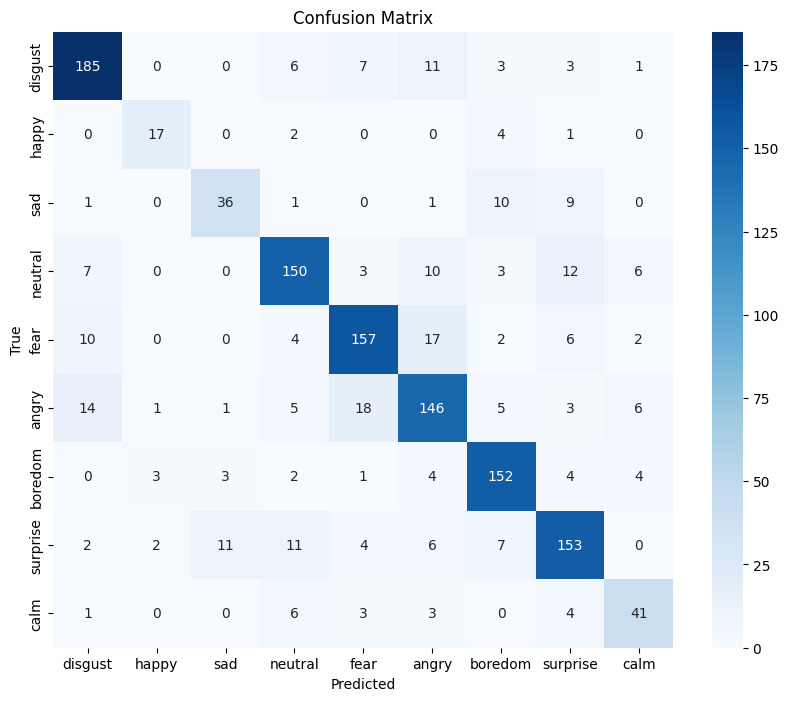

In [78]:
## Simple SVM(1) classifier with feature scaling (2)
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Train the model
clf12 = svm.SVC(kernel='linear')
clf12.fit(X_train_scaled, y_train)
pred12 = clf12.predict(X_test_scaled)
print("Performance SVM with feature scaling\n", classification_report(y_test, pred12))

# Generate a confusion matrix
cm = confusion_matrix(y_test, pred12)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Performance RandomForest with feature scaling
               precision    recall  f1-score   support

       angry       0.85      0.89      0.87       216
     boredom       0.92      0.92      0.92        24
        calm       0.68      0.88      0.77        58
     disgust       0.87      0.80      0.84       191
        fear       0.81      0.83      0.82       198
       happy       0.81      0.75      0.78       199
     neutral       0.94      0.87      0.91       173
         sad       0.84      0.87      0.85       196
    surprise       0.62      0.62      0.62        58

    accuracy                           0.83      1313
   macro avg       0.81      0.83      0.82      1313
weighted avg       0.83      0.83      0.83      1313



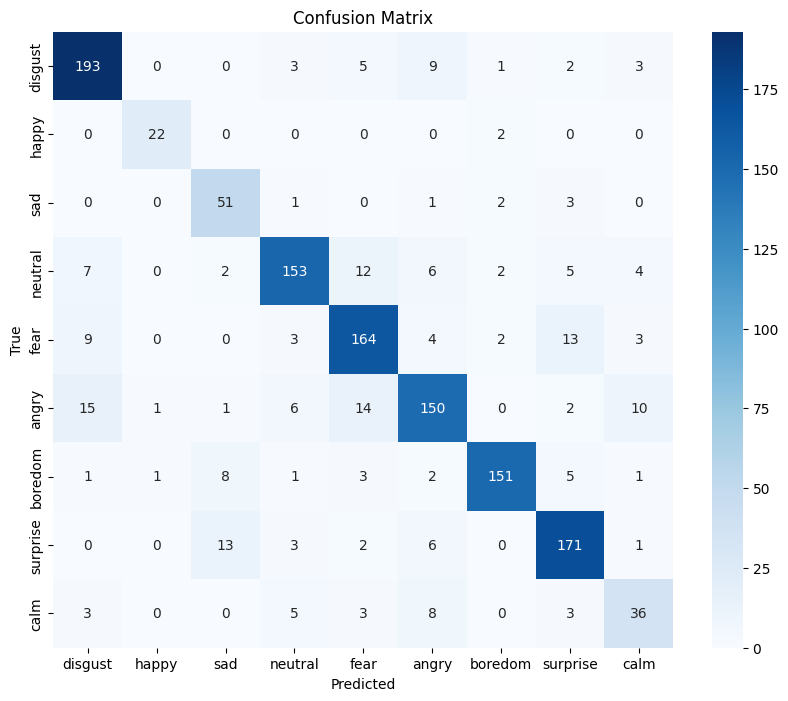

In [79]:
from sklearn.ensemble import RandomForestClassifier
clf12 = RandomForestClassifier()
clf12.fit(X_train_scaled, y_train)
pred12 = clf12.predict(X_test_scaled)
print("Performance RandomForest with feature scaling\n", classification_report(y_test, pred12))

# Generate a confusion matrix
cm = confusion_matrix(y_test, pred12)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


              precision    recall  f1-score   support

       angry       0.89      0.88      0.88       216
     boredom       0.95      0.83      0.89        24
        calm       0.63      0.67      0.65        58
     disgust       0.86      0.85      0.86       191
        fear       0.82      0.81      0.82       198
       happy       0.77      0.80      0.78       199
     neutral       0.87      0.88      0.88       173
         sad       0.83      0.81      0.82       196
    surprise       0.74      0.74      0.74        58

    accuracy                           0.83      1313
   macro avg       0.82      0.81      0.81      1313
weighted avg       0.83      0.83      0.83      1313



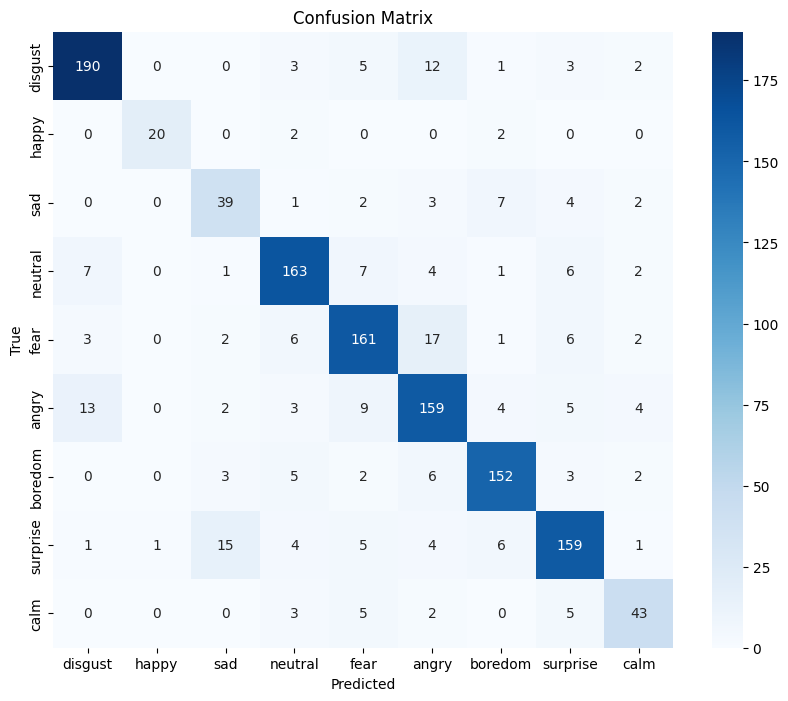

In [97]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Feature scaling is CRUCIAL for MLP
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize MLP
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    early_stopping=True,
    validation_fraction=0.2,
    random_state=42,
    alpha=0.0001
)

# Train
mlp.fit(X_train_scaled, y_train)
#mlp.fit(X_train, y_train)

# Evaluate
pred_mlp = mlp.predict(X_test_scaled) #83%
#pred_mlp = mlp.predict(X_test) # 60%
print(classification_report(y_test, pred_mlp))

# Generate a confusion matrix
cm = confusion_matrix(y_test, pred_mlp)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [83]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(100,), (100,50), (100,50,25)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}

grid = GridSearchCV(MLPClassifier(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(100,), (100, 50),
                                                (100, 50, 25)]})

In [85]:
grid.best_params_

{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100,)}

In [95]:
grid.best_score_

0.8327863608738765

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define classifiers and parameter grids
classifiers = {
    'SVM': {
        'model': SVC(),
        'params': {
            'clf__C': [0.1, 1, 10, 100],
            'clf__kernel': ['linear', 'rbf', 'poly'],
            'clf__gamma': ['scale', 'auto', 0.1, 1]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'clf__n_estimators': [100, 200, 300],
            'clf__max_depth': [None, 10, 20],
            'clf__min_samples_split': [2, 5, 10]
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'clf__C': [0.1, 1, 10],
            'clf__penalty': ['l1', 'l2'],
            'clf__solver': ['liblinear', 'saga']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'clf__n_neighbors': [3, 5, 7, 9],
            'clf__weights': ['uniform', 'distance']
        }
    }
}

# Store results
results = []

for name, classifier in classifiers.items():
    # Create pipeline with scaler and classifier
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', classifier['model'])
    ])
    
    # Grid Search with 10-fold CV
    grid = GridSearchCV(
        estimator=pipe,
        param_grid=classifier['params'],
        cv=10,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    
    grid.fit(X_train, y_train)
    
    # Store results
    results.append({
        'model': name,
        'best_score': grid.best_score_,
        'best_params': grid.best_params_,
        'test_score': grid.score(X_test, y_test)
    })
    
    print(f"\n{name} Best Parameters: {grid.best_params_}")
    print(f"Validation Accuracy: {grid.best_score_:.3f}")
    print(f"Test Accuracy: {grid.score(X_test, y_test):.3f}")

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df[['model', 'best_score', 'test_score']])

Fitting 10 folds for each of 48 candidates, totalling 480 fits

SVM Best Parameters: {'clf__C': 10, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}
Validation Accuracy: 0.840
Test Accuracy: 0.848
Fitting 10 folds for each of 27 candidates, totalling 270 fits

RandomForest Best Parameters: {'clf__max_depth': 20, 'clf__min_samples_split': 2, 'clf__n_estimators': 300}
Validation Accuracy: 0.840
Test Accuracy: 0.839
Fitting 10 folds for each of 12 candidates, totalling 120 fits


/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 


LogisticRegression Best Parameters: {'clf__C': 10, 'clf__penalty': 'l1', 'clf__solver': 'saga'}
Validation Accuracy: 0.795
Test Accuracy: 0.794
Fitting 10 folds for each of 8 candidates, totalling 80 fits

KNN Best Parameters: {'clf__n_neighbors': 5, 'clf__weights': 'distance'}
Validation Accuracy: 0.793
Test Accuracy: 0.794

Model Comparison:
                model  best_score  test_score
0                 SVM    0.839646    0.847677
1        RandomForest    0.839641    0.839299
2  LogisticRegression    0.794892    0.794364
3                 KNN    0.792617    0.794364


In [99]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from src.select_features import FeatureSelector

# Create pipeline with fixed SVM params and feature selector
pipeline = Pipeline([
    ('selector', FeatureSelector()),
    ('clf', SVC(C=10, gamma='scale', kernel='rbf', random_state=42))  # Fixed SVM params
])

# Define parameter grid for feature selection
param_grid = {
    'selector__algorithm': ['algorithm1', 'algorithm2'],
    'selector__L': [0.7, 0.8, 0.9, 0.95],
    'selector__MS': [0.7, 0.75, 0.8],  # Only used with algorithm2
    'selector__dispersion_measure': ['MM', 'MAD', 'TV', 'AMGM']
}

# Configure grid search
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=10,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

# Run grid search
grid_search.fit(X_train, y_train)

# Results analysis
print("Best parameters:", grid_search.best_params_)
print("Best CV accuracy:", grid_search.best_score_)
print("Test accuracy:", grid_search.score(X_test, y_test))

# Save results to DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)
results_df.to_csv('feature_selection_grid_search_results.csv', index=False)

Fitting 10 folds for each of 96 candidates, totalling 960 fits
[CV] END selector__L=0.7, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=MAD; total time=   2.0s
[CV] END selector__L=0.7, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=MM; total time=   2.0s
[CV] END selector__L=0.7, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=MM; total time=   2.0s
[CV] END selector__L=0.7, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=MM; total time=   2.0s
[CV] END selector__L=0.7, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=MM; total time=   2.0s
[CV] END selector__L=0.7, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=MAD; total time=   2.0s
[CV] END selector__L=0.7, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=MM; total time=   2.0s
[CV] END selector__L=0.7, selector__MS=

/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.7, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.0s
[CV] END selector__L=0.7, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.0s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.7, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.0s
[CV] END selector__L=0.7, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.0s
[CV] END selector__L=0.7, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   1.9s
[CV] END selector__L=0.7, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.0s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.7, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.0s
[CV] END selector__L=0.7, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.0s
[CV] END selector__L=0.7, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.0s
[CV] END selector__L=0.7, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.0s
[CV] END selector__L=0.7, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.0s
[CV] END selector__L=0.7, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.0s
[CV] END selector__L=0.7, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.0s
[CV] END selector__L=0.7, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersi

/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.7, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=MAD; total time=   1.8s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.7, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.8s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.7, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.8s
[CV] END selector__L=0.7, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.8s
[CV] END selector__L=0.7, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.9s
[CV] END selector__L=0.7, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.8s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.7, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.8s
[CV] END selector__L=0.7, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.8s
[CV] END selector__L=0.7, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.8s
[CV] END selector__L=0.7, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.9s
[CV] END selector__L=0.7, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.9s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.7, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   1.7s
[CV] END selector__L=0.7, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   1.7s
[CV] END selector__L=0.7, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   1.6s
[CV] END selector__L=0.7, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   1.8s
[CV] END selector__L=0.7, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   1.5s
[CV] END selector__L=0.7, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   1.7s
[CV] END selector__L=0.7, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   1.7s
[CV] END selector__L=0.7, selector__MS=0.7, selector__algorithm=algorithm2, selector__disp

/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.7, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.0s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.7, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.0s
[CV] END selector__L=0.7, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.0s
[CV] END selector__L=0.7, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.0s
[CV] END selector__L=0.7, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.0s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.7, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.0s
[CV] END selector__L=0.7, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.0s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.7, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   1.8s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.7, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   1.8s
[CV] END selector__L=0.7, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   1.9s
[CV] END selector__L=0.7, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   1.8s
[CV] END selector__L=0.7, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   1.8s
[CV] END selector__L=0.7, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   1.9s
[CV] END selector__L=0.7, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   1.9s
[CV] END selector__L=0.7, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   1.9s
[CV] END selector__L=0.7, selector__MS=0.75, selector__algorithm=algorithm1, selector__

/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.7, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.8s
[CV] END selector__L=0.7, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=MAD; total time=   1.8s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.7, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.8s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.7, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.8s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.7, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.9s
[CV] END selector__L=0.7, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.9s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.7, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.9s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.7, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.9s
[CV] END selector__L=0.7, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.9s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.7, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.9s
[CV] END selector__L=0.7, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   1.6s
[CV] END selector__L=0.7, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   1.7s
[CV] END selector__L=0.7, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   1.8s
[CV] END selector__L=0.7, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   1.7s
[CV] END selector__L=0.7, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   1.6s
[CV] END selector__L=0.7, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   1.6s
[CV] END selector__L=0.7, selector__MS=0.75, selector__algorithm=algorithm2, selector

/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.7, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=MAD; total time=   1.7s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.7, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   1.8s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.7, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   1.8s
[CV] END selector__L=0.7, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   1.8s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.7, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   1.8s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.7, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   1.8s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.7, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   1.8s
[CV] END selector__L=0.7, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   1.8s
[CV] END selector__L=0.7, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   1.8s
[CV] END selector__L=0.7, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   1.8s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.7, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   1.8s
[CV] END selector__L=0.7, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   1.8s
[CV] END selector__L=0.7, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   1.9s
[CV] END selector__L=0.7, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   1.8s
[CV] END selector__L=0.7, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   1.8s
[CV] END selector__L=0.7, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   1.9s
[CV] END selector__L=0.7, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   1.8s
[CV] END selector__L=0.7, selector__MS=0.8, selector__algorithm=algorithm1, selector__disper

/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.7, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.8s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.7, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.8s
[CV] END selector__L=0.7, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.8s
[CV] END selector__L=0.7, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.9s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.7, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.8s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.7, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.9s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.7, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.0s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.7, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.9s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.7, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.8s
[CV] END selector__L=0.7, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.8s
[CV] END selector__L=0.7, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   1.8s
[CV] END selector__L=0.7, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   1.7s
[CV] END selector__L=0.7, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   1.8s
[CV] END selector__L=0.7, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   1.7s
[CV] END selector__L=0.7, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   1.9s
[CV] END selector__L=0.7, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersi

/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   1.8s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   1.8s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   1.8s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   1.8s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   1.8s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   1.7s
[CV] END selector__L=0.8, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   1.7s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   1.8s
[CV] END selector__L=0.8, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   1.8s
[CV] END selector__L=0.8, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   1.8s
[CV] END selector__L=0.8, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   1.8s
[CV] END selector__L=0.8, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   1.8s
[CV] END selector__L=0.8, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   1.9s
[CV] END selector__L=0.8, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   1.8s
[CV] END selector__L=0.8, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersi

/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=MAD; total time=   1.8s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.8s
[CV] END selector__L=0.8, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.8s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.8s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.8s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.8s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.8s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.8s
[CV] END selector__L=0.8, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.8s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.9s
[CV] END selector__L=0.8, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.8s
[CV] END selector__L=0.8, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   1.7s
[CV] END selector__L=0.8, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   1.8s
[CV] END selector__L=0.8, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   1.7s
[CV] END selector__L=0.8, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   1.8s
[CV] END selector__L=0.8, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   1.6s
[CV] END selector__L=0.8, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersi

/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.2s
[CV] END selector__L=0.8, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.1s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.2s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.2s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.1s
[CV] END selector__L=0.8, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.2s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.1s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.0s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.0s
[CV] END selector__L=0.8, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.0s
[CV] END selector__L=0.8, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.0s
[CV] END selector__L=0.8, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.0s
[CV] END selector__L=0.8, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.0s
[CV] END selector__L=0.8, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.0s
[CV] END selector__L=0.8, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.0s
[CV] END selector__L=0.8, selector__MS=0.75, selector__algorithm=algorithm1, selector__

/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=MAD; total time=   1.9s
[CV] END selector__L=0.8, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.0s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.0s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.9s
[CV] END selector__L=0.8, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.9s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.9s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.9s
[CV] END selector__L=0.8, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.9s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.9s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.9s
[CV] END selector__L=0.8, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.0s
[CV] END selector__L=0.8, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   1.8s
[CV] END selector__L=0.8, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   1.9s
[CV] END selector__L=0.8, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   2.0s
[CV] END selector__L=0.8, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   1.9s
[CV] END selector__L=0.8, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   1.9s
[CV] END selector__L=0.8, selector__MS=0.75, selector__algorithm=algorithm2, selector__

/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.0s
[CV] END selector__L=0.8, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=MAD; total time=   1.9s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   1.9s
[CV] END selector__L=0.8, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   1.9s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   1.9s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.1s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.2s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.2s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.1s
[CV] END selector__L=0.8, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.1s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.0s
[CV] END selector__L=0.8, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.0s
[CV] END selector__L=0.8, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.0s
[CV] END selector__L=0.8, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.0s
[CV] END selector__L=0.8, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.0s
[CV] END selector__L=0.8, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.1s
[CV] END selector__L=0.8, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.0s
[CV] END selector__L=0.8, selector__MS=0.8, selector__algorithm=algorithm1, selector__disper

/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=MAD; total time=   2.0s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.1s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.0s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.1s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.9s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.0s
[CV] END selector__L=0.8, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.0s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.0s
[CV] END selector__L=0.8, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.1s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.8, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.0s
[CV] END selector__L=0.8, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.0s
[CV] END selector__L=0.8, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   1.9s
[CV] END selector__L=0.8, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   2.0s
[CV] END selector__L=0.8, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   2.3s
[CV] END selector__L=0.8, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   2.3s
[CV] END selector__L=0.8, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   2.1s
[CV] END selector__L=0.8, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersi

/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=MAD; total time=   2.3s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.3s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.3s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.3s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.3s
[CV] END selector__L=0.9, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.3s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.3s
[CV] END selector__L=0.9, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.4s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.4s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.4s
[CV] END selector__L=0.9, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.4s
[CV] END selector__L=0.9, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.4s
[CV] END selector__L=0.9, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.3s
[CV] END selector__L=0.9, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.3s
[CV] END selector__L=0.9, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.3s
[CV] END selector__L=0.9, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.2s
[CV] END selector__L=0.9, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersi

/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=MAD; total time=   2.0s
[CV] END selector__L=0.9, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.0s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   1.9s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.1s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.0s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.0s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.0s
[CV] END selector__L=0.9, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.0s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.0s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.0s
[CV] END selector__L=0.9, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.1s
[CV] END selector__L=0.9, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   1.9s
[CV] END selector__L=0.9, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   1.9s
[CV] END selector__L=0.9, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   2.1s
[CV] END selector__L=0.9, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   2.0s
[CV] END selector__L=0.9, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   1.8s
[CV] END selector__L=0.9, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersi

/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.3s
[CV] END selector__L=0.9, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.3s
[CV] END selector__L=0.9, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.3s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.2s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.2s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.3s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.3s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.2s
[CV] END selector__L=0.9, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.3s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.2s
[CV] END selector__L=0.9, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.4s
[CV] END selector__L=0.9, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.4s
[CV] END selector__L=0.9, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.5s
[CV] END selector__L=0.9, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.5s
[CV] END selector__L=0.9, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.4s
[CV] END selector__L=0.9, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.5s
[CV] END selector__L=0.9, selector__MS=0.75, selector__algorithm=algorithm1, selector

/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=MAD; total time=   2.1s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.1s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.1s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.2s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.1s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.1s
[CV] END selector__L=0.9, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.1s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.1s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   1.9s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.2s
[CV] END selector__L=0.9, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.2s
[CV] END selector__L=0.9, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   2.1s
[CV] END selector__L=0.9, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.4s
[CV] END selector__L=0.9, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   2.0s
[CV] END selector__L=0.9, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   2.0s
[CV] END selector__L=0.9, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   1.9s
[CV] END selector__L=0.9, selector__MS=0.75, selector__algorithm=algorithm2, selector__di

/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=MAD; total time=   2.2s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.2s
[CV] END selector__L=0.9, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.2s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.1s
[CV] END selector__L=0.9, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.2s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.2s
[CV] END selector__L=0.9, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.2s
[CV] END selector__L=0.9, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.2s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.1s
[CV] END selector__L=0.9, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.1s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.2s
[CV] END selector__L=0.9, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.2s
[CV] END selector__L=0.9, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.2s
[CV] END selector__L=0.9, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.1s
[CV] END selector__L=0.9, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.1s
[CV] END selector__L=0.9, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.1s
[CV] END selector__L=0.9, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.2s
[CV] END selector__L=0.9, selector__MS=0.8, selector__algorithm=algorithm1, selector__disper

/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=MAD; total time=   2.1s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.2s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.2s
[CV] END selector__L=0.9, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.2s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.1s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.2s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.2s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.1s
[CV] END selector__L=0.9, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.2s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.9, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.3s
[CV] END selector__L=0.9, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.2s
[CV] END selector__L=0.9, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   2.0s
[CV] END selector__L=0.9, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   2.2s
[CV] END selector__L=0.9, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   2.3s
[CV] END selector__L=0.9, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   2.2s
[CV] END selector__L=0.9, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   2.1s
[CV] END selector__L=0.9, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersi

/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.1s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.0s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.1s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.1s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.1s
[CV] END selector__L=0.95, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.1s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.1s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.2s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.2s
[CV] END selector__L=0.95, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.1s
[CV] END selector__L=0.95, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.1s
[CV] END selector__L=0.95, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.1s
[CV] END selector__L=0.95, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.1s
[CV] END selector__L=0.95, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.1s
[CV] END selector__L=0.95, selector__MS=0.7, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.1s
[CV] END selector__L=0.95, selector__MS=0.7, selector__algorithm=algorithm1, selector__

/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=MAD; total time=   2.1s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.2s
[CV] END selector__L=0.95, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.2s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.2s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.1s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.1s
[CV] END selector__L=0.95, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.1s
[CV] END selector__L=0.95, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.1s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.1s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.3s
[CV] END selector__L=0.95, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.3s
[CV] END selector__L=0.95, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   2.1s
[CV] END selector__L=0.95, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   2.1s
[CV] END selector__L=0.95, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   2.2s
[CV] END selector__L=0.95, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   1.9s
[CV] END selector__L=0.95, selector__MS=0.7, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   2.0s
[CV] END selector__L=0.95, selector__MS=0.7, selector__algorithm=algorithm2, selector__

/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.1s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.0s
[CV] END selector__L=0.95, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.0s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.1s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.1s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.1s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.1s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.2s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.2s
[CV] END selector__L=0.95, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.2s
[CV] END selector__L=0.95, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.2s
[CV] END selector__L=0.95, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.2s
[CV] END selector__L=0.95, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.1s
[CV] END selector__L=0.95, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.2s
[CV] END selector__L=0.95, selector__MS=0.75, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.2s
[CV] END selector__L=0.95, selector__MS=0.75, selector__algorithm=algorithm1, se

/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=MAD; total time=   2.1s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.2s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.3s
[CV] END selector__L=0.95, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.2s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.1s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.2s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.2s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.1s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.2s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.3s
[CV] END selector__L=0.95, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   2.0s
[CV] END selector__L=0.95, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.3s
[CV] END selector__L=0.95, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   2.2s
[CV] END selector__L=0.95, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   2.0s
[CV] END selector__L=0.95, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   2.0s
[CV] END selector__L=0.95, selector__MS=0.75, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   1.9s
[CV] END selector__L=0.95, selector__MS=0.75, selector__algorithm=algorithm2, se

/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=MAD; total time=   2.1s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.2s
[CV] END selector__L=0.95, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.2s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.1s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.2s
[CV] END selector__L=0.95, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.1s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.2s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.2s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.2s
[CV] END selector__L=0.95, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.2s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=TV; total time=   2.2s
[CV] END selector__L=0.95, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.2s
[CV] END selector__L=0.95, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.2s
[CV] END selector__L=0.95, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.3s
[CV] END selector__L=0.95, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.2s
[CV] END selector__L=0.95, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.2s
[CV] END selector__L=0.95, selector__MS=0.8, selector__algorithm=algorithm1, selector__dispersion_measure=AMGM; total time=   2.2s
[CV] END selector__L=0.95, selector__MS=0.8, selector__algorithm=algorithm1, selector

/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=MAD; total time=   2.0s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.1s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.0s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.0s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.0s
[CV] END selector__L=0.95, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.0s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean
/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.0s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.2s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.1s


/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/src/select_features.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  dispersions[i] = arithmetic_mean / geometric_mean


[CV] END selector__L=0.95, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.2s
[CV] END selector__L=0.95, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=TV; total time=   2.1s
[CV] END selector__L=0.95, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   1.9s
[CV] END selector__L=0.95, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   2.2s
[CV] END selector__L=0.95, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   2.1s
[CV] END selector__L=0.95, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   2.1s
[CV] END selector__L=0.95, selector__MS=0.8, selector__algorithm=algorithm2, selector__dispersion_measure=AMGM; total time=   2.0s
[CV] END selector__L=0.95, selector__MS=0.8, selector__algorithm=algorithm2, selector__

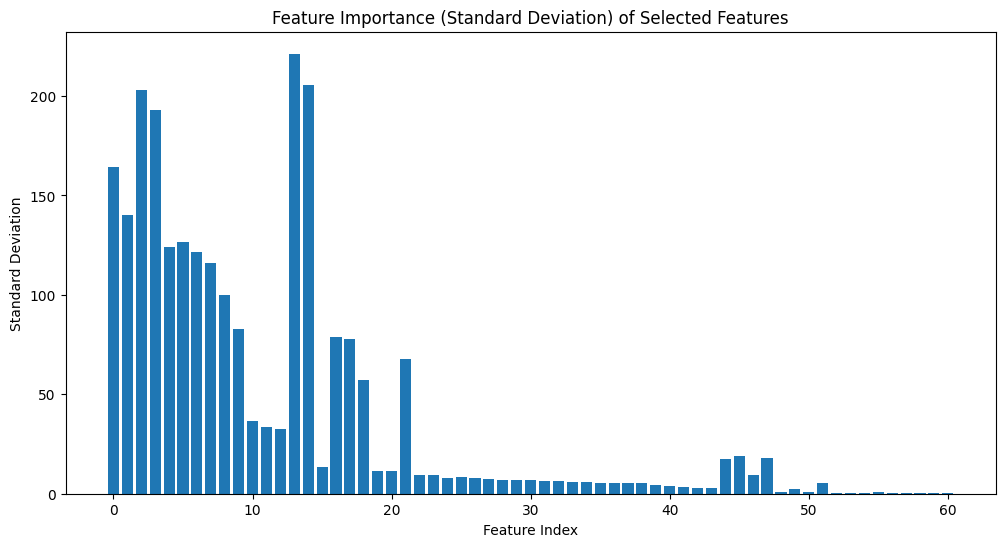

In [100]:

best_selector = grid_search.best_estimator_.named_steps['selector']
plt.figure(figsize=(12, 6))
plt.bar(range(len(best_selector.selected_indices)), 
        X_train.std(axis=0)[best_selector.selected_indices])
plt.title('Feature Importance (Standard Deviation) of Selected Features')
plt.xlabel('Feature Index')
plt.ylabel('Standard Deviation')
plt.show()